# Census Income 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import zipfile
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32560, 15)

In [5]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null values

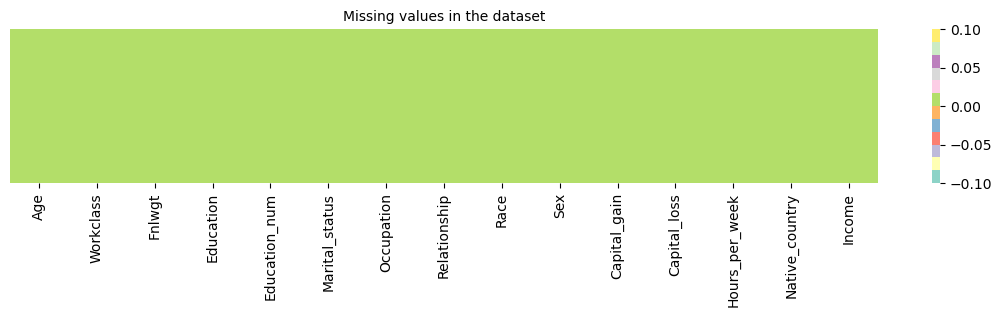

In [9]:
plt.figure(figsize=(14,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Set3')
plt.title('Missing values in the dataset', fontsize=10);

In [10]:
info_df = df.nunique().to_frame('No. of Unique values')
info_df['type'] = df.dtypes.values

info_df

,No. of Unique values,type
Age,73,int64
Workclass,9,object
Fnlwgt,21647,int64
Education,16,object
Education_num,16,int64
Marital_status,7,object
Occupation,15,object
Relationship,6,object
Race,5,object
Sex,2,object


In [11]:
 #Checking for columns with one unique value or have the same unique values as rows has the dataset
info_df[(info_df['No. of Unique values'] == 1) | (info_df['No. of Unique values'] == df.shape[0]) ]

,No. of Unique values,type


The dataset contains the following categorical variables: Workclass(9), Education(16), Marital_status(7), Occupation(15), Relationship(6), Race(5), Sex(2), Native_country(42), Income(2) with its respective unique values.

In [12]:
# Checking the target variable
df['Income'].value_counts().to_frame()

,Income
<=50K,24719
>50K,7841


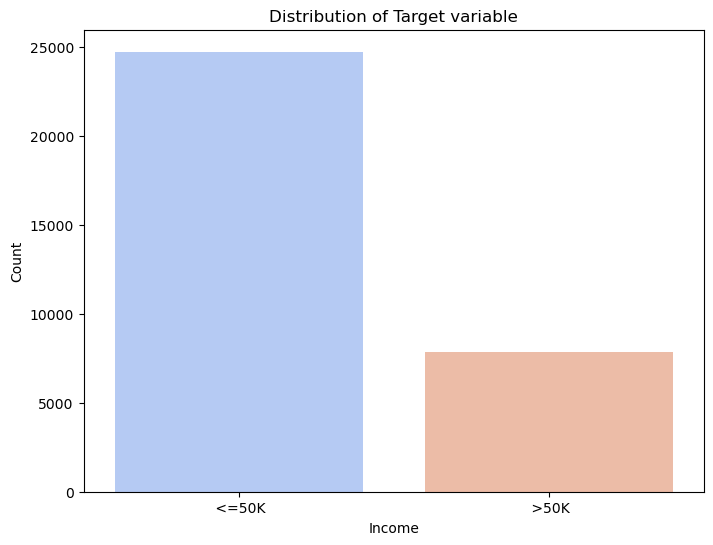

In [13]:
# Visualize the distribution of Income

col = 'Income'
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x=col, palette='coolwarm')

plt.title('Distribution of Target variable')
plt.xlabel(col)
plt.ylabel('Count')
plt.show()

In [14]:
# Separating Numerical and Categorical columns
categorical_col = []
numerical_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)

#  Numerical and Categorical columns
print(f"Categorical Columns:\n {categorical_col}\n")
print(f"Numerical Columns:\n {numerical_col}\n")

Categorical Columns:
 ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

Numerical Columns:
 ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']



In [15]:
# Checking the value counts of the categorical independent variables
for i, col in enumerate(categorical_col[1:]):
    print(f"{i+1}.{col}:\n{df[col].value_counts()}\n")

1.Education:
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

2.Marital_status:
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

3.Occupation:
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994

In [16]:
# Checking the value counts of the numerical independent variables
for i, col in enumerate(numerical_col):
    print(f"{i+1}.{col}:\n{df[col].value_counts()}\n")

1.Age:
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

2.Fnlwgt:
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

3.Education_num:
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

4.Capital_gain:
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

5.Capital_loss:
0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Ca

In [17]:
print(f"% of zeros in Capital_gain column is {df.Capital_gain.value_counts(normalize=True)[0]*100:.2f}%")
print(f"% of zeros in Capital_loss column is {df.Capital_loss.value_counts(normalize=True)[0]*100:.2f}%")

% of zeros in Capital_gain column is 91.67%
% of zeros in Capital_loss column is 95.33%


In [18]:
#These are the unique values for the numerical independent variables. The Capital_gain and Capital_loss columns have a large number of zeros, 91.67% and 95.33% respectively.

In [19]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [21]:
df.describe(exclude=[np.number])

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


In [22]:
# Searching for duplicated values
print(f"There are {df.duplicated().sum()} duplicates in the dataset.")

There are 24 duplicates in the dataset.


In [23]:
# Drop duplicated rows 
df.drop_duplicates(inplace=True)

# checking the new dimension of the dataset
print(f"After dropping duplicates, the rows and columns in the dataset: {df.shape}")
print(f"Now, There are {df.duplicated().sum()} duplicates in the dataset.")

After dropping duplicates, the rows and columns in the dataset: (32536, 15)
Now, There are 0 duplicates in the dataset.


In [24]:
# Define the mapping for combining categories
category_mapping = {
    'Assoc-voc': 'Associate',
    'Assoc-acdm': 'Associate',
    '11th': 'Below High School',
    '10th': 'Below High School',
    '7th-8th': 'Below High School',
    '9th': 'Below High School',
    '12th': 'Below High School',
    '5th-6th': 'Below High School',
    '1st-4th': 'Below High School',
    'Preschool': 'Below High School'
}
col = 'Education'

# Eliminating extra spaces 
df[col] = df[col].str.strip()

# In column Occupation_bk will reserve the original values
df['Education_bk'] = df[col]

# Assing the combined categories
df[col] = df[col].replace(category_mapping)
df[col].unique()

array(['Bachelors', 'HS-grad', 'Below High School', 'Masters',
       'Some-college', 'Associate', 'Doctorate', 'Prof-school'],
      dtype=object)

In [25]:
# Define the order for the category Education with original values.
col = 'Education_bk'
order_cat =  ['Doctorate', 'Masters', 'Bachelors', 'Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college','HS-grad', 
              '11th', '10th', '7th-8th', '9th', '12th', '5th-6th', '1st-4th', 'Preschool']
df[col] = pd.Categorical(df[col], categories=order_cat, ordered=True)

# Confirming setting the category
print(f"Categories for {col}:")
display(df[col].dtype)

Categories for Education_bk:


CategoricalDtype(categories=['Doctorate', 'Masters', 'Bachelors', 'Assoc-voc',
                  'Assoc-acdm', 'Prof-school', 'Some-college', 'HS-grad',
                  '11th', '10th', '7th-8th', '9th', '12th', '5th-6th',
                  '1st-4th', 'Preschool'],
, ordered=True)

In [26]:
# Define the order for the categorical features.

categories_order = {}

for i,col in enumerate(categorical_col[:-1]):
    print(f"{i+1}.{col}:")
    
    # Eliminating extra spaces 
    df[col] = df[col].str.strip()
    # Defining ? == Unknown
    df[col] = df[col].str.replace('?', 'Unknown') # Later these will considering missing values

    # Transform to ordered categories
    if col == 'Education':
        order_cat = ['Doctorate', 'Masters', 'Bachelors', 'Associate', 'Prof-school',
                     'Some-college','HS-grad', 'Below High School']
    else:   
        order_cat = df[col].value_counts().index.to_list()
    
    categories_order[col] = order_cat
    df[col] = pd.Categorical(df[col], categories=order_cat, ordered=True)

# Confirming setting the category
    display(df[col].dtype)

1.Workclass:


CategoricalDtype(categories=['Private', 'Self-emp-not-inc', 'Local-gov', 'Unknown',
                  'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay',
                  'Never-worked'],
, ordered=True)

2.Education:


CategoricalDtype(categories=['Doctorate', 'Masters', 'Bachelors', 'Associate',
                  'Prof-school', 'Some-college', 'HS-grad',
                  'Below High School'],
, ordered=True)

3.Marital_status:


CategoricalDtype(categories=['Married-civ-spouse', 'Never-married', 'Divorced',
                  'Separated', 'Widowed', 'Married-spouse-absent',
                  'Married-AF-spouse'],
, ordered=True)

4.Occupation:


CategoricalDtype(categories=['Prof-specialty', 'Craft-repair', 'Exec-managerial',
                  'Adm-clerical', 'Sales', 'Other-service',
                  'Machine-op-inspct', 'Unknown', 'Transport-moving',
                  'Handlers-cleaners', 'Farming-fishing', 'Tech-support',
                  'Protective-serv', 'Priv-house-serv', 'Armed-Forces'],
, ordered=True)

5.Relationship:


CategoricalDtype(categories=['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife',
                  'Other-relative'],
, ordered=True)

6.Race:


CategoricalDtype(categories=['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
                  'Other'],
, ordered=True)

7.Sex:


CategoricalDtype(categories=['Male', 'Female'], ordered=True)

8.Native_country:


CategoricalDtype(categories=['United-States', 'Mexico', 'Unknown', 'Philippines',
                  'Germany', 'Canada', 'Puerto-Rico', 'El-Salvador', 'India',
                  'Cuba', 'England', 'Jamaica', 'South', 'China', 'Italy',
                  'Dominican-Republic', 'Vietnam', 'Japan', 'Guatemala',
                  'Poland', 'Columbia', 'Taiwan', 'Haiti', 'Iran', 'Portugal',
                  'Nicaragua', 'Peru', 'France', 'Greece', 'Ecuador',
                  'Ireland', 'Hong', 'Cambodia', 'Trinadad&Tobago', 'Laos',
                  'Thailand', 'Yugoslavia', 'Outlying-US(Guam-USVI-etc)',
                  'Honduras', 'Hungary', 'Scotland', 'Holand-Netherlands'],
, ordered=True)

In [27]:
# Distribution of Income
df['Income'].value_counts().to_frame()

,Income
<=50K,24697
>50K,7839


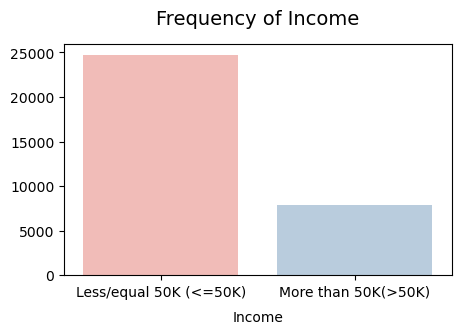

In [28]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of Income
col = 'Income'
plt.figure(figsize=(5, 3))
ax = sns.countplot(x=col, data=df)

plt.xlabel(col, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1), ['Less/equal 50K (<=50K)', 'More than 50K(>50K)'], size=10)
plt.title(f"Frequency of {col}", size=14, y=1.05);

In [29]:
# List of categorical columns in the dataset
for i,col in enumerate(categorical_col[:-1]):
    print(f"{i+1}.{col}")

1.Workclass
2.Education
3.Marital_status
4.Occupation
5.Relationship
6.Race
7.Sex
8.Native_country


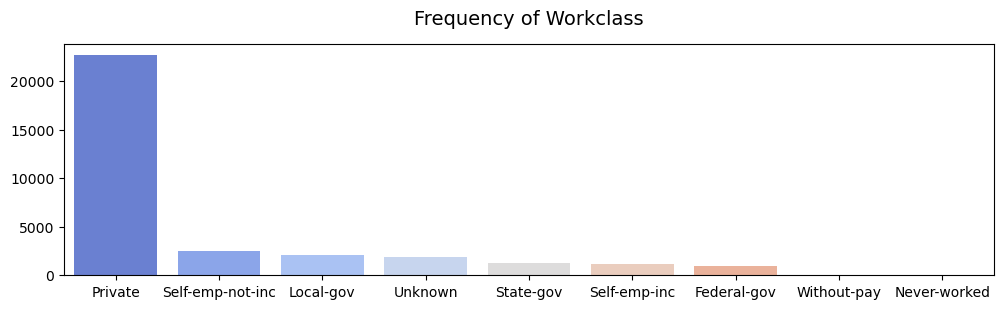

In [31]:
# Visualize the frequency of Workclass(1)
col = 'Workclass'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()
ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='coolwarm', order=df_counts.index.categories.to_list())


plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

In [32]:
# Display the counts and % of each category
df[col].value_counts().to_frame().T

,Private,Self-emp-not-inc,Local-gov,Unknown,State-gov,Self-emp-inc,Federal-gov,Without-pay,Never-worked
Workclass,22673,2540,2093,1836,1297,1116,960,14,7


69.7% are private workclass, and the rest of the categories have a presence of less than 8%. For consolidation in the analysis, would be interesting to group all self-employees, all government employees, and those with no income(Without-pay + Never-worked).

Text(0.5, 1.05, 'Frequency of Education')

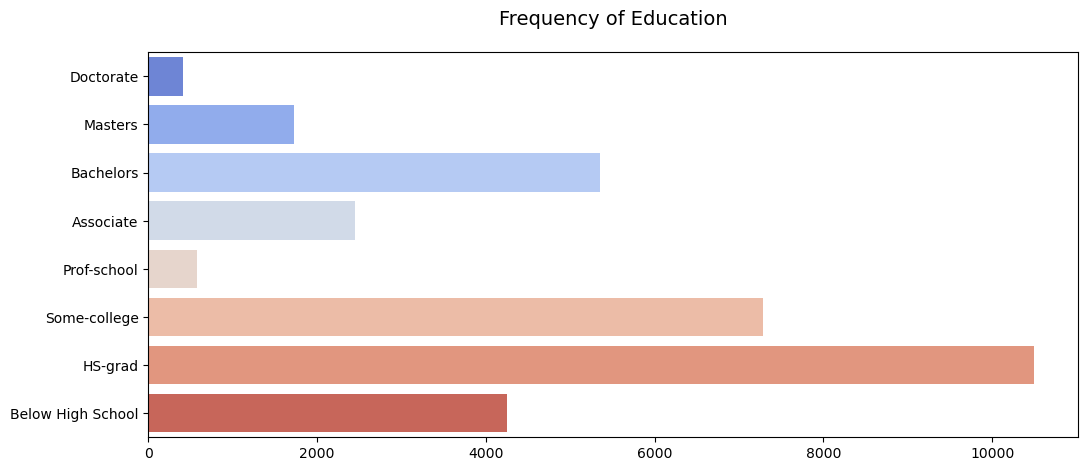

In [33]:
# Visualize the frequency of Education(2)
col = 'Education'
plt.figure(figsize=(12, 5))
df_sorted = df[col].value_counts().to_frame()
ax = sns.barplot(y=df_sorted.index, x=df_sorted[col], palette='coolwarm')

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

In [34]:
# Display the counts and % of each category
df_sorted['%'] = round(df[col].value_counts(normalize=True) * 100, 2)
df_sorted.T

,HS-grad,Some-college,Bachelors,Below High School,Associate,Masters,Prof-school,Doctorate
Education,10494.00,7282.00,5352.00,4248.00,2449.00,1722.00,576.00,413.00
%,32.25,22.38,16.45,13.06,7.53,5.29,1.77,1.27


32.25% have a High school graduate level of education, followed by Some college with 22.38%, Bachelor with 16.45%, Below High School with 13.06%, Associate with 7.53%, and Master with 5.29%. The rest of the observations have a representation of less than 5%.

Text(0.5, 1.05, 'Frequency of Marital_status')

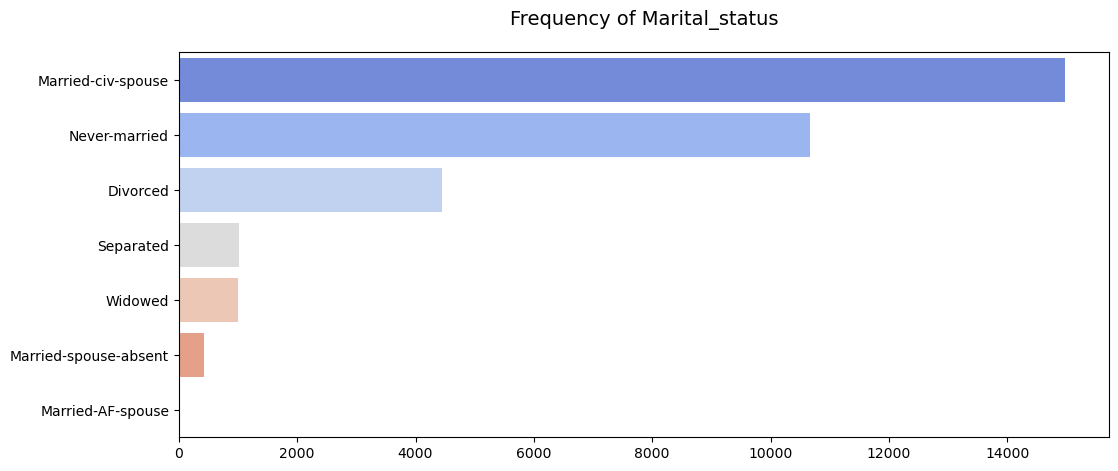

In [35]:
# Visualize the frequency of Marital_status(3)
col = 'Marital_status'
plt.figure(figsize=(12, 5))
df_sorted = df[col].value_counts().to_frame()
ax = sns.barplot(y=df_sorted.index, x=df_sorted[col], palette='coolwarm')

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

In [36]:
# Display the counts and % of each category
df_sorted['%'] = round(df[col].value_counts(normalize=True) * 100, 2)
df_sorted.T

,Married-civ-spouse,Never-married,Divorced,Separated,Widowed,Married-spouse-absent,Married-AF-spouse
Marital_status,14970.00,10666.00,4441.00,1025.00,993.00,418.00,23.00
%,46.01,32.78,13.65,3.15,3.05,1.28,0.07


46.01% are married to a civilian spouse, 32.78% have never been married, 13.65% are divorced, 6.20% are separated or widowed, 1.28% are married but the spouse is absent, and less than 1% are married with a spouse in the Armed Forces.

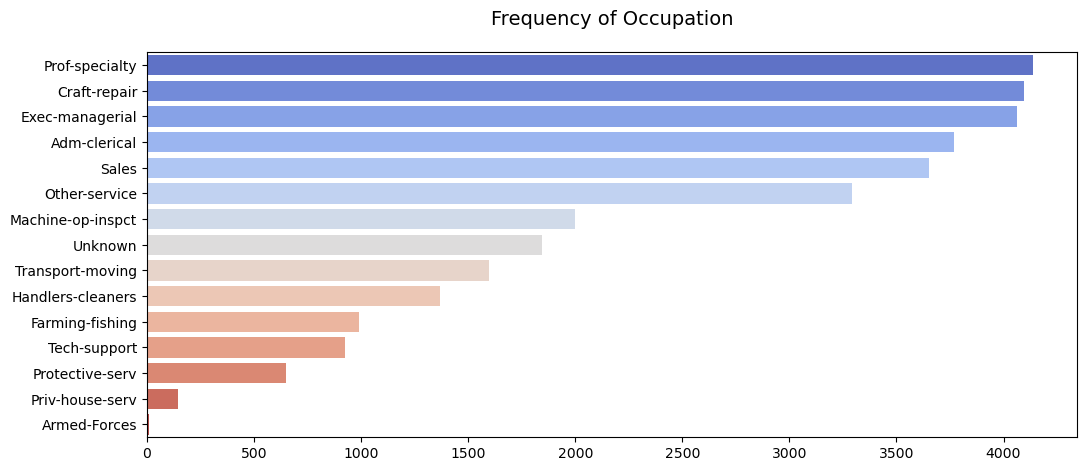

In [37]:
# Visualize the frequency of Occupation(4)
col = 'Occupation'
plt.figure(figsize=(12, 5))
df_sorted = df[col].value_counts().to_frame()
ax = sns.barplot(y=df_sorted.index, x=df_sorted[col], palette='coolwarm')

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()

In [38]:
# Display the counts and % of each category
df_sorted['%'] = round(df[col].value_counts(normalize=True) * 100, 2)
df_sorted.T

,Prof-specialty,Craft-repair,Exec-managerial,Adm-clerical,Sales,Other-service,Machine-op-inspct,Unknown,Transport-moving,Handlers-cleaners,Farming-fishing,Tech-support,Protective-serv,Priv-house-serv,Armed-Forces
Occupation,4136.00,4094.00,4065.00,3767.00,3650.00,3291.00,2000.00,1843.00,1597.00,1369.00,992.00,927.00,649.00,147.00,9.00
%,12.71,12.58,12.49,11.58,11.22,10.11,6.15,5.66,4.91,4.21,3.05,2.85,1.99,0.45,0.03


The top 5 occupations are as follows in order:

Professional specialist (12.71%)
Craft repair (12.58%)
Executive Manager (12.49%)
Administrative Clerks(11.58%)
Sales (11.22%)
There is a 5.66% unknown occupation.

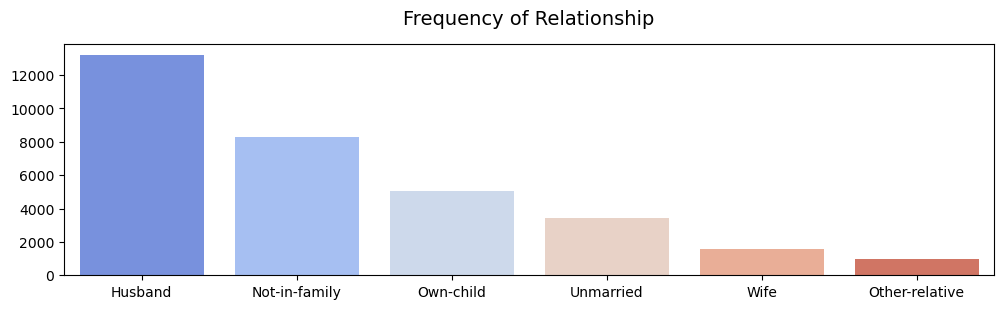

In [41]:
# Visualize the frequency of Relationship(5)
col = 'Relationship'
plt.figure(figsize=(12, 3))
ax = sns.countplot(x=col, data=df, palette='coolwarm')
 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()

In [40]:
# Display the counts and % of each category
df[col].value_counts().to_frame().T

,Husband,Not-in-family,Own-child,Unmarried,Wife,Other-relative
Relationship,13187,8291,5064,3445,1568,981


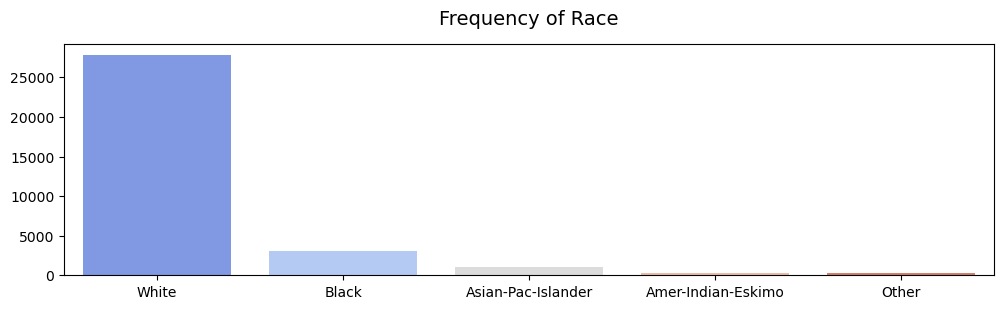

In [43]:
# Visualize the frequency of Race(6)
col = 'Race'
plt.figure(figsize=(12, 3))
ax = sns.countplot(x=col, data=df, palette='coolwarm')


plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()

In [44]:
# Display the counts and % of each category
df[col].value_counts().to_frame().T

,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other
Race,27794,3122,1038,311,271


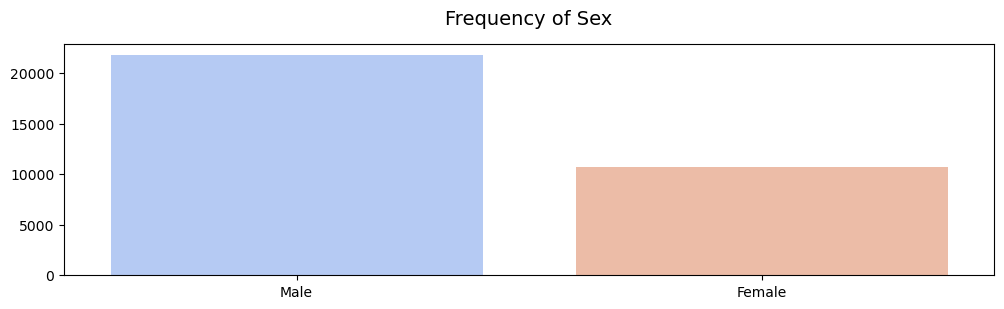

In [45]:
# Visualize the frequency of Sex(7)
col = 'Sex'
plt.figure(figsize=(12, 3))
ax = sns.countplot(x=col, data=df, palette='coolwarm')
 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()

In [46]:
# Display the counts and % of each category
df[col].value_counts().to_frame().T

,Male,Female
Sex,21774,10762


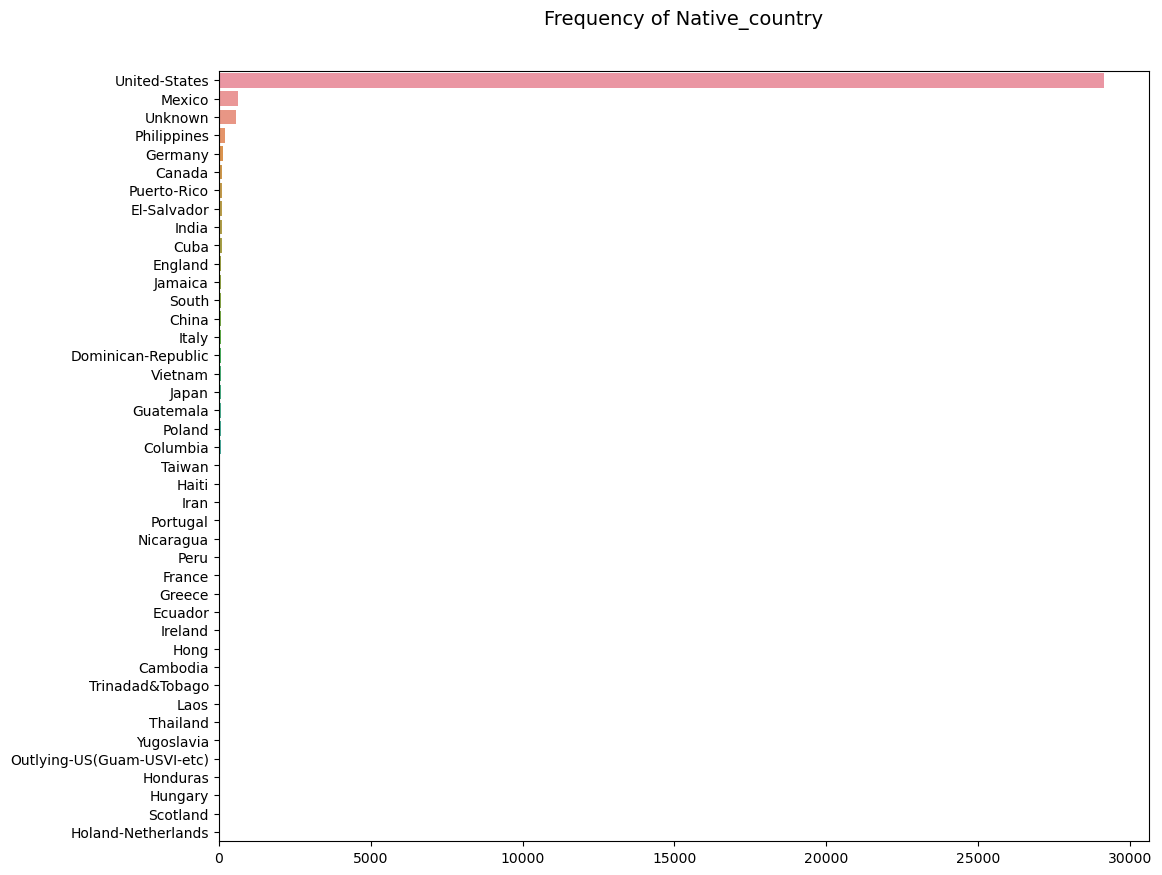

In [47]:
# Visualize the frequency of Native_country(8)
col = 'Native_country'
plt.figure(figsize=(12, 10))
df_sorted = df[col].value_counts().to_frame()
ax = sns.barplot(y=df_sorted.index, x=df_sorted[col])

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()

In [48]:
# Display the counts and % of each category
df_sorted['%'] = round(df[col].value_counts(normalize=True) * 100, 2)
df_sorted.T

,United-States,Mexico,Unknown,Philippines,Germany,Canada,Puerto-Rico,El-Salvador,India,Cuba,...,Trinadad&Tobago,Cambodia,Laos,Thailand,Yugoslavia,Outlying-US(Guam-USVI-etc),Honduras,Hungary,Scotland,Holand-Netherlands
Native_country,29152.0,639.00,582.00,198.00,137.00,121.00,114.00,106.00,100.00,95.00,...,19.00,19.00,18.00,18.00,16.00,14.00,13.00,13.00,12.00,1.0
%,89.6,1.96,1.79,0.61,0.42,0.37,0.35,0.33,0.31,0.29,...,0.06,0.06,0.06,0.06,0.05,0.04,0.04,0.04,0.04,0.0


The top 5 Native countries are as follows in order:

United States (89.6%)
Mexico (1.96%)
Unknown (1.79%)
Philippines (0.61%)
Germany (0.42%)
The rest of the native countries only have less than 0.42%. Almost 90% correspond to the United States.

In [49]:
# List of numerical columns
for i,col in enumerate(numerical_col):
    print(f"{i+1}. {col}")

1. Age
2. Fnlwgt
3. Education_num
4. Capital_gain
5. Capital_loss
6. Hours_per_week


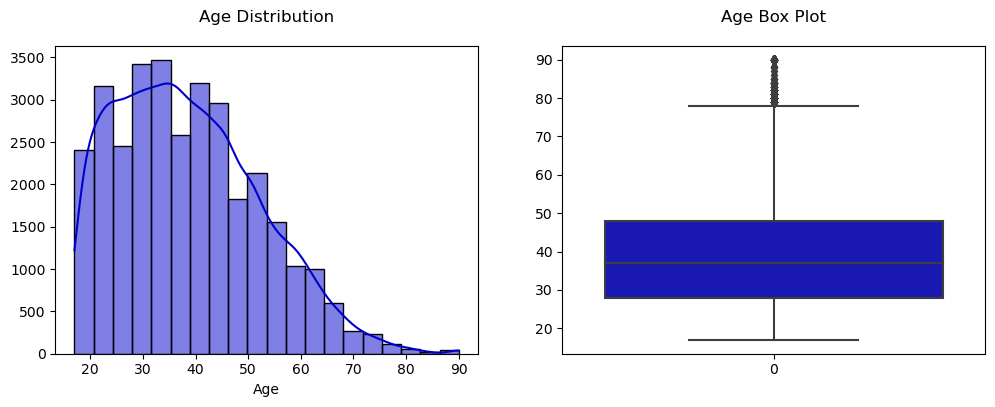

Skewness of Age : 0.557657407634356


In [50]:
#Visualize (1) Age distribution
col = 'Age'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='mediumblue')
sns.boxplot(df[col], ax=axes[1], color='mediumblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Age
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of Age is skewed to the right. There are outliers present in the Box plot.

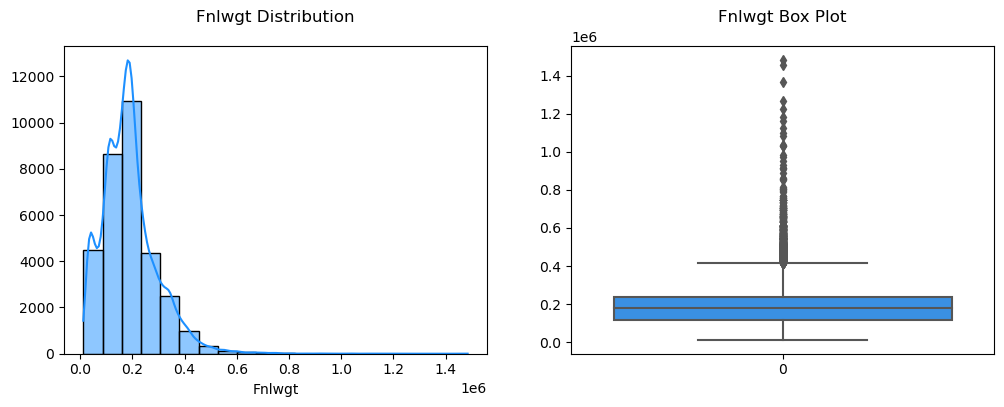

Skewness of Fnlwgt : 1.447695071063747


In [51]:
#Visualize (2) Fnlwgt distribution
col = 'Fnlwgt'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='dodgerblue')
sns.boxplot(df[col], ax=axes[1], color='dodgerblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of Fnlwgt is skewed to the right. There are outliers present in the Box plot.

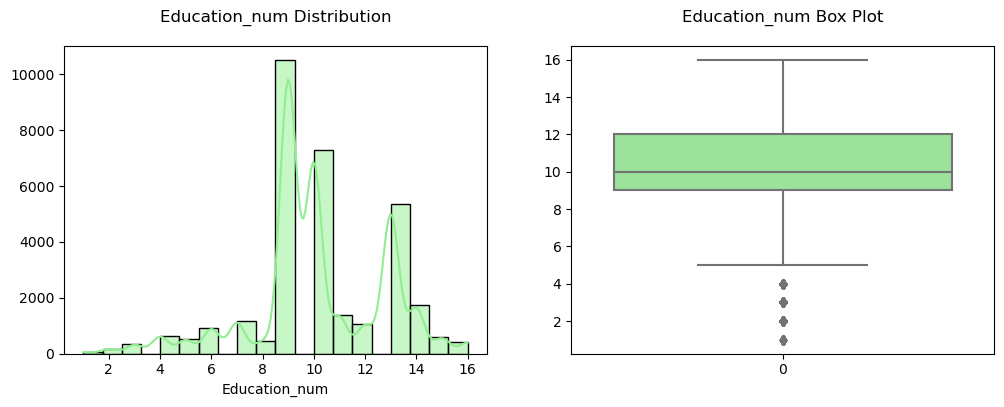

Skewness of Education_num : -0.30945415628220213


In [52]:
#Visualize (3) Education_num distribution
col = 'Education_num'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='lightgreen')
sns.boxplot(df[col], ax=axes[1], color='lightgreen')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Education_num
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of Education_num is skewed to the left. There are outliers present in the Box plot. This feature despite being numerical, would be interesting to analyze as a categorical feature.

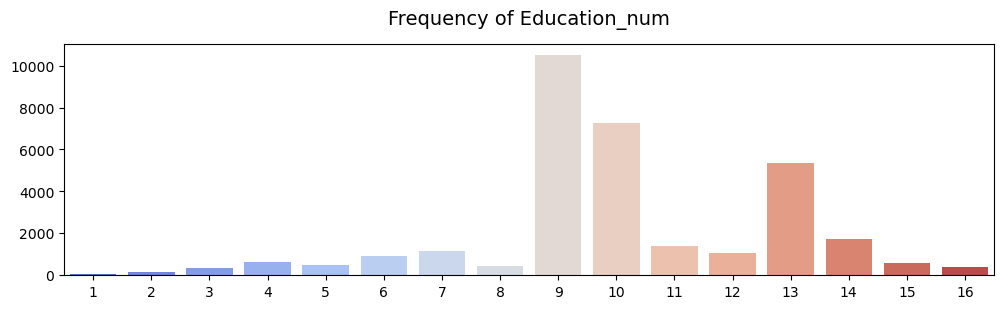

In [54]:
# Visualize the frequency of Education_num (3)
col = 'Education_num'
plt.figure(figsize=(12, 3))
df_sorted = df[col].value_counts().to_frame()
ax = sns.barplot(x=df_sorted.index, y=df_sorted[col], palette='coolwarm')


plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()

The majority of the observations correspond to who has 9 to 14 years of education.

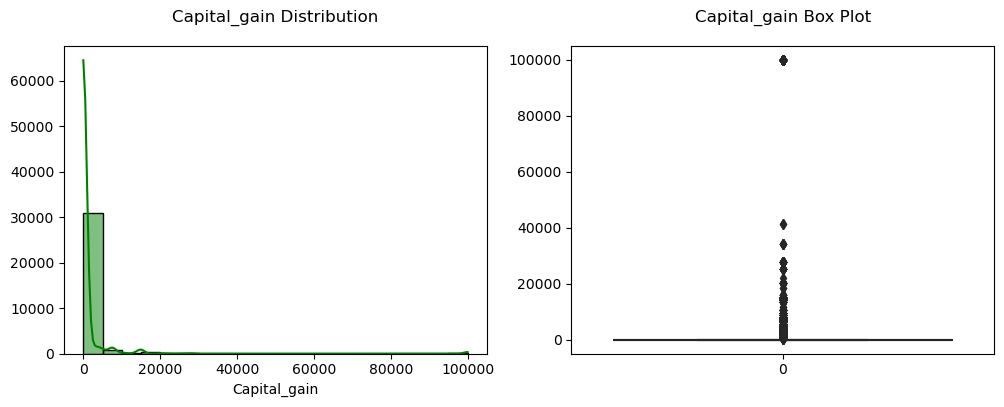

Skewness of Capital_gain : 11.949244909052934


In [55]:
#Visualize (4) Capital_gain distribution
col = 'Capital_gain'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='g')
sns.boxplot(df[col], ax=axes[1], color='g')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Capital_gain
print(f"Skewness of {col} : {df[col].skew()}")

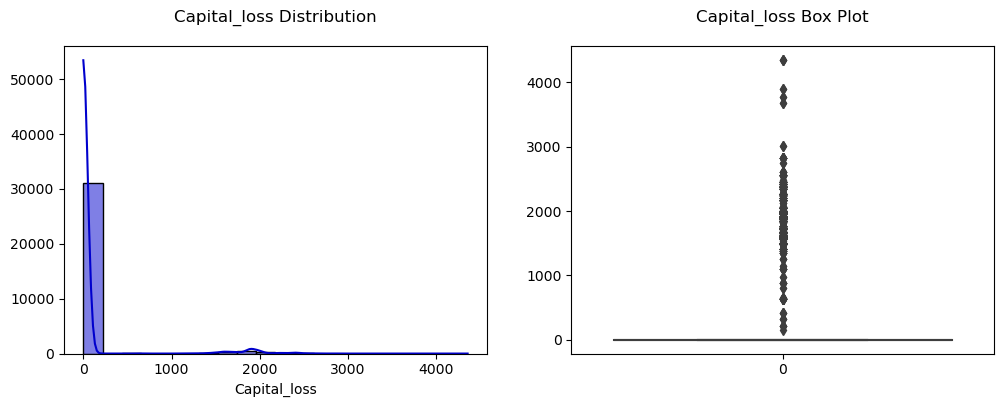

Skewness of Capital_loss : 4.592622126751731


In [56]:
#Visualize (5) Capital_loss distribution
col = 'Capital_loss'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='mediumblue')
sns.boxplot(df[col], ax=axes[1], color='mediumblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Capital_loss
print(f"Skewness of {col} : {df[col].skew()}")


The distribution of Capital_loss is skewed to the right. There are outliers present in the Box plot.

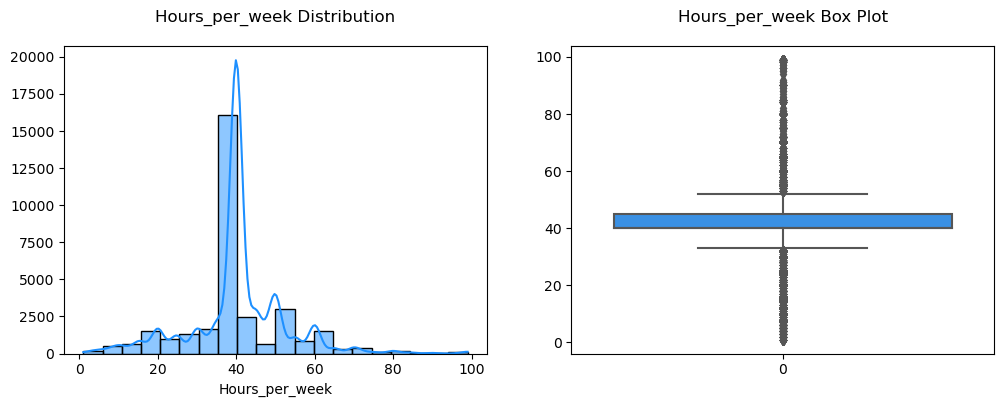

Skewness of Hours_per_week : 0.2287520890962958


In [57]:
#Visualize (6) Hours_per_week distribution
col = 'Hours_per_week'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='dodgerblue')
sns.boxplot(df[col], ax=axes[1], color='dodgerblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Hours_per_week
print(f"Skewness of {col} : {df[col].skew()}")


The distribution of Hours_per_week seems almost normal. There are outliers present in the Box plot

In [58]:
numerical_col

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

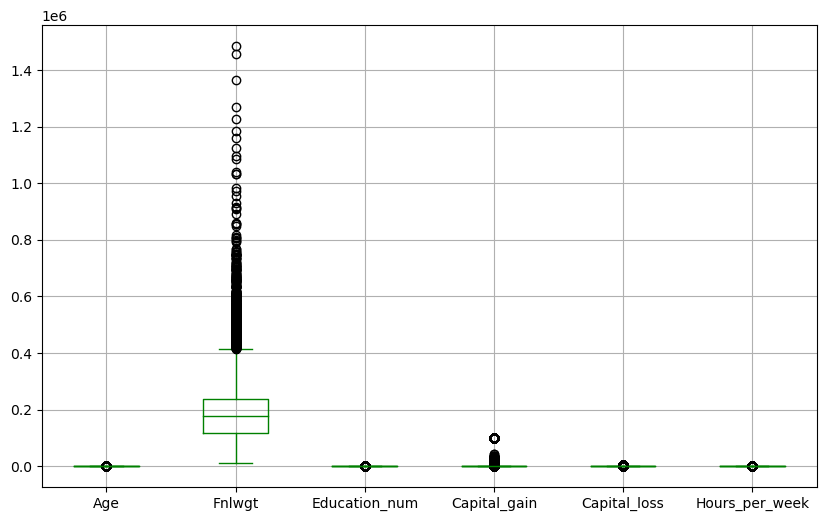

In [59]:
# Draw a boxplot for numericak variables
plt.figure(figsize=(10, 6))
df.boxplot(column=numerical_col, figsize=(10,10), color='green');

In [60]:
# List of numerical columns
for i,col in enumerate(numerical_col):
    print(f"{i+1}. {col}")

1. Age
2. Fnlwgt
3. Education_num
4. Capital_gain
5. Capital_loss
6. Hours_per_week


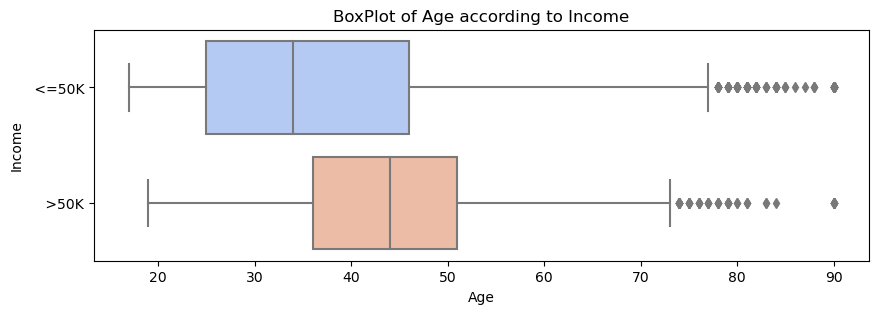

In [61]:
# Visualizing and comparing each independent variable with target
# Columns 1. Age 
col = 'Age'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()

Those with an income of more than >50k tend to be between 36 and 51 years old, and those with less income tend to be between 24 an 45 years old. There are outliers both for those with an income >50k and for those with a lower income. Seems like age has an influence on the target variable.

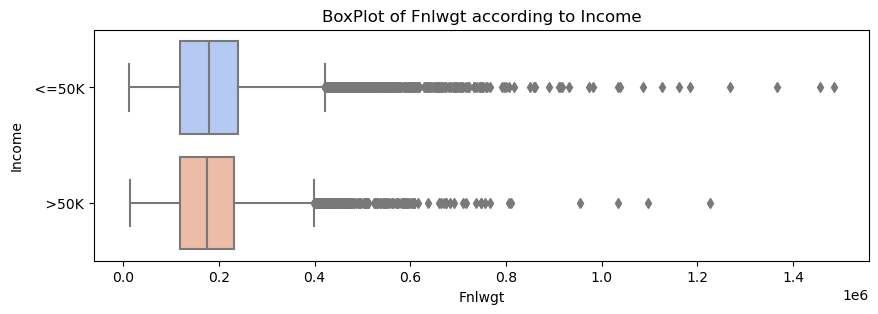

In [62]:
# Visualizing and comparing each independent variable with target
# Columns 2. Fnlwgt 
col = 'Fnlwgt'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()

The final weight (Fnlwgt) seems to behave similarly for those who have a >50 income as those who have a lower income. However, the group with an income <=50K presents more outliers. This feature seems to have no significant impact on the target variable.

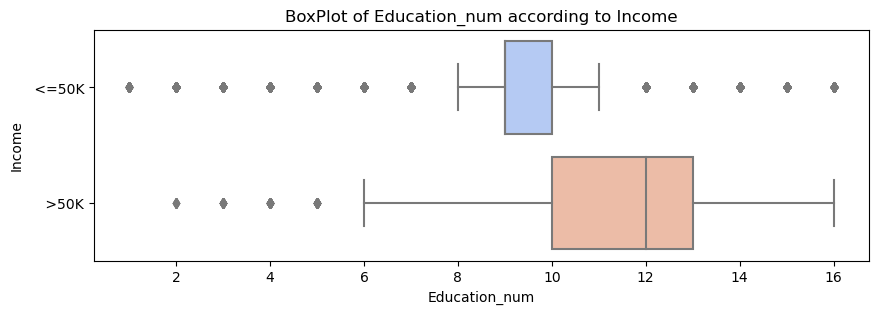

In [63]:
# Visualizing and comparing each independent variable with target
# Columns 3. Education_num 
col = 'Education_num'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()

It Seems like the Education number has an impact on those who have a >50K income since those who have 10 years of education or more tend to perceive >50k as income.

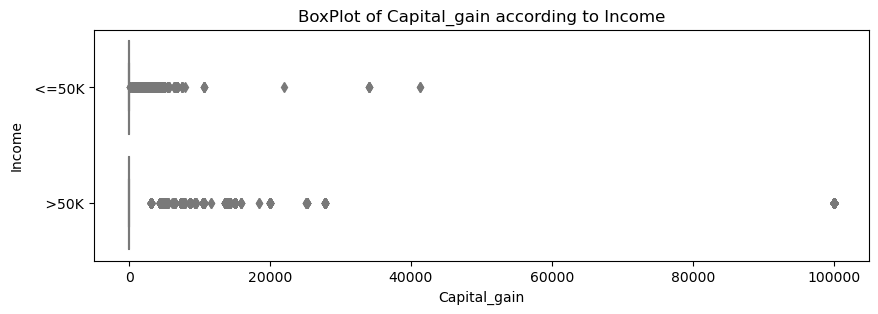

In [64]:
# Visualizing and comparing each independent variable with target
# Columns 4. Capital_gain 
col = 'Capital_gain'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()

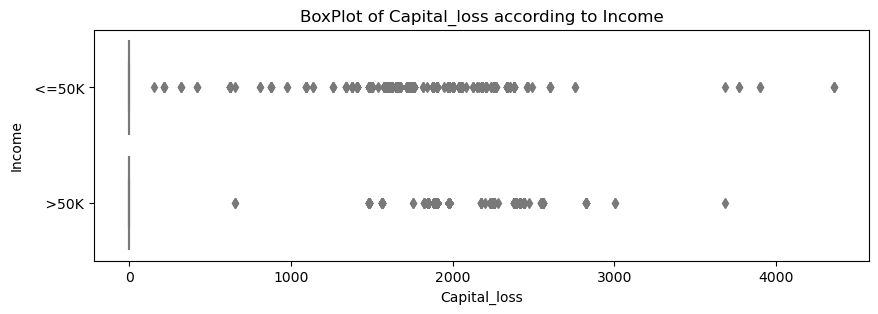

In [65]:
# Visualizing and comparing each independent variable with target
# Columns 5. Capital_loss 
col = 'Capital_loss'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()

In [66]:
# Filter the non-zero observations for Capital_gain/Capital_loss
df_capital = df[(df['Capital_gain'] > 0) | (df['Capital_loss'] > 0) ]
print(f"The non-zero observations represent {df_capital.shape[0]/df.shape[0] * 100:.2f}%.")
print(f"The dataframe dimensions with non-zero observations in Capital_gain and Capital_loss is {df_capital.shape}")

The non-zero observations represent 13.00%.
The dataframe dimensions with non-zero observations in Capital_gain and Capital_loss is (4230, 16)


We will plot the boxplot for the sample with values in Capital gain and Capital loss in order to have a better view of the impact of these data on the target variable.

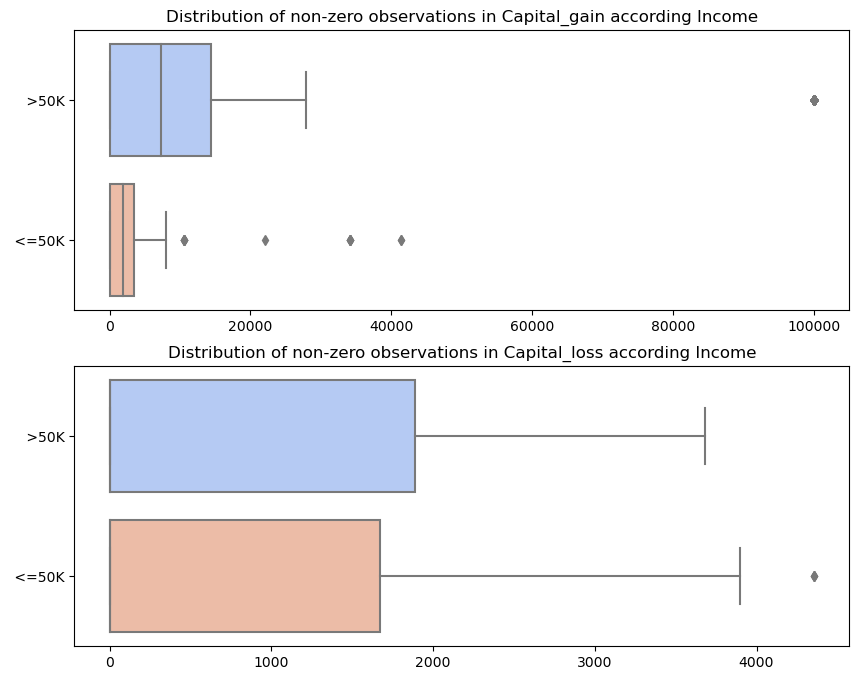

In [67]:
# Box-plot comparing the non-zero observation in Capital gain and Capital loss according to Income
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

col = 'Capital_gain'
sns.boxplot(data=df_capital[[col,'Income']], x=col, y='Income', palette='coolwarm', ax=axes[0])
axes[0].set_title(f"Distribution of non-zero observations in {col} according Income", size=12, y=1);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].set_xlabel('', size=10, labelpad=8)

col = 'Capital_loss'
sns.boxplot(data=df_capital[[col,'Income']], x=col, y='Income', palette='coolwarm', ax=axes[1])
axes[1].set_title(f"Distribution of non-zero observations in {col} according Income", size=12, y=1);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].set_xlabel('', size=10, labelpad=8)

plt.show()

In the above plot, we can notice the impact of the non-zero values for Capital_gain/Capital_loss in the target variable. Those who have an income >50K had a capital gain more than those who have an income <=50K as we can see in the upper boxplot. On the other hand, those who have an income >50K had a capital loss slightly higher than those who have a lower income(<=50K)

For these variables, we will apply feature engineering to transform the columns dividing into intervals (binning).

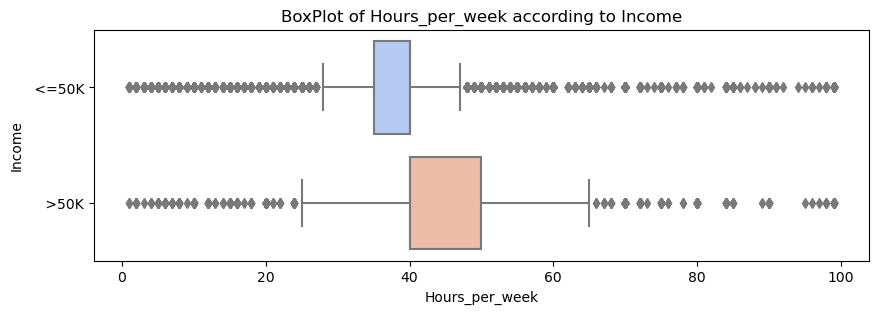

In [68]:
# Visualizing and comparing each independent variable with target
# Columns 6 Hours_per_week 
col = 'Hours_per_week'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()

In [69]:
# List of categorical columns in the dataset
for i,col in enumerate(categorical_col[:-1]):
    print(f"{i+1}.{col}")


1.Workclass
2.Education
3.Marital_status
4.Occupation
5.Relationship
6.Race
7.Sex
8.Native_country


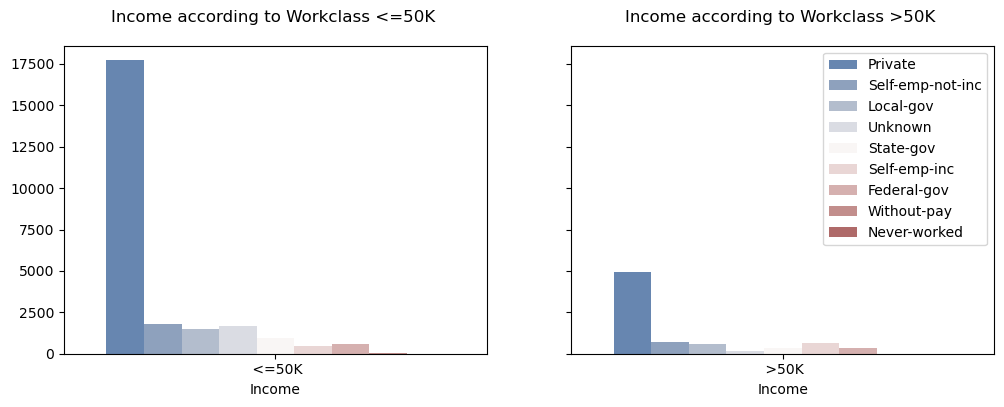

In [71]:
# Compare Workclass vs Income
col = 'Workclass' #1

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])

axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

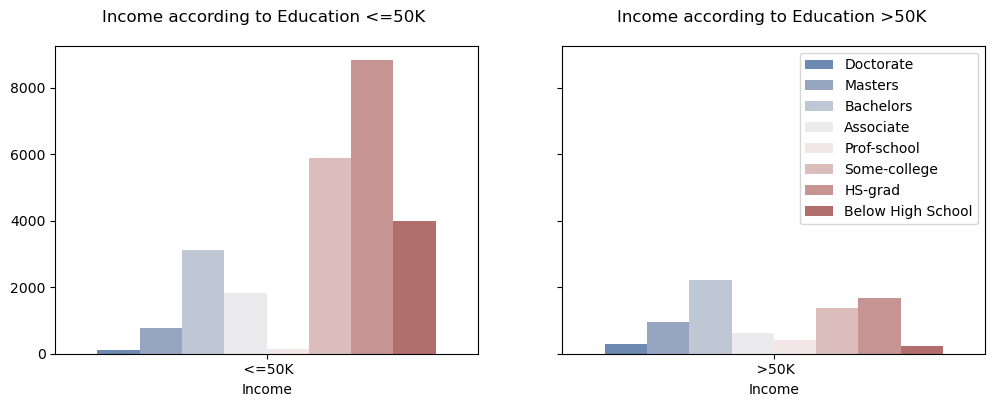

In [72]:
# Compare Education vs Income
col = 'Education' #2

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

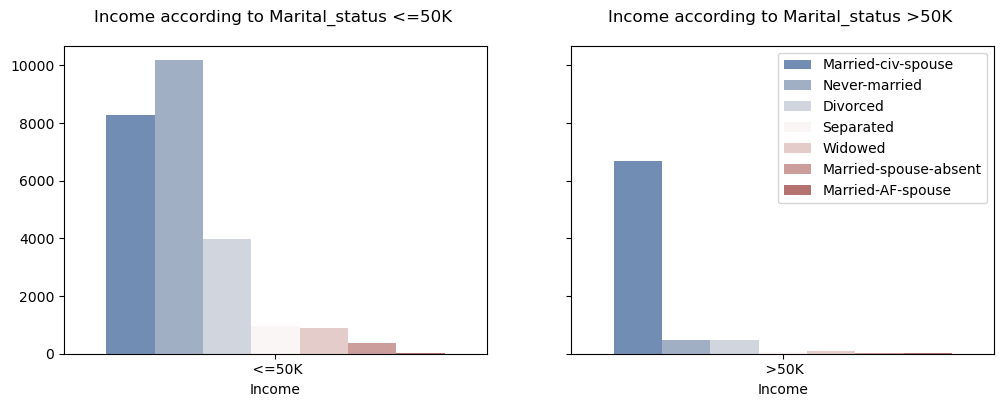

In [73]:
# Compare Marital_status vs Income
col = 'Marital_status' #3

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

In [74]:
# Function to format % labels and specify the position for the 'Other' category
def format_label(pct):
    if pct < 5:  
        return f"{pct:.1f}%"
    return f"\n  {pct:.1f}%"

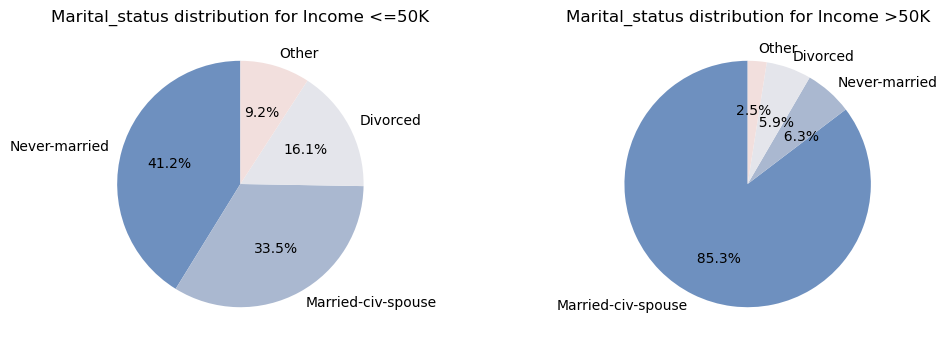

In [75]:
# Distribution of Marital Status according to Income
col = 'Marital_status' #3

sns.set_palette('vlag')

# Filter the data for the two income categories
df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

# Calculate the counts for each 'Marital_status' category in each income group
counts_less_50K = df_less_50K[col].value_counts()
counts_more_50K = df_more_50K[col].value_counts()

# Create subplots for the pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Select 3 top categories for 'Income <=50K'
top_categories = counts_less_50K.nlargest(3)
labels = top_categories.index.to_list()
labels.append('Other')
data = top_categories.to_list()
data.append(counts_less_50K.sum() - top_categories.sum())

# Plot pie chart for 'Income <=50K'
axes[0].pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title(f"{col} distribution for Income <=50K")

# Select 3 top categories for 'Income >50K'
top_categories = counts_more_50K.nlargest(3)
labels = top_categories.index.to_list()
labels.append('Other')
data = top_categories.to_list()
data.append(counts_more_50K.sum() - top_categories.sum())

# Plot pie chart for 'Income >50K'
axes[1].pie(data, labels=labels, autopct=format_label, startangle=90)
axes[1].set_title(f"{col} distribution for Income >50K")

plt.show()

The majority of those who have an income >50K are married to a civilian spouse 85.3% while the other marital statuses have a minimal presence 6.3% or less.

In contrast, those who have an income less than <=50K mostly never had been married 41.2%, followed by 33.5% who are married to a civilian spouse, 16.1% divorced, and the rest 9.2% correspond to other marital statuses.

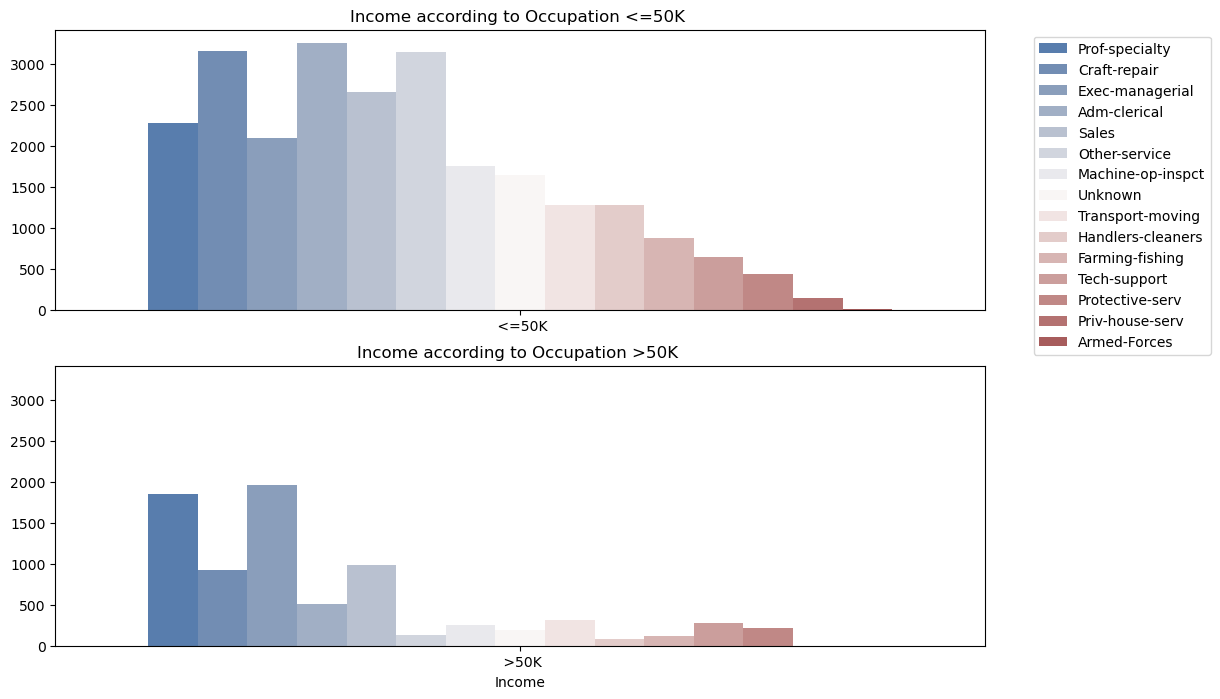

In [77]:
# Compare Occupation vs Income
col = 'Occupation' #4

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].set_xlabel('', size=10, labelpad=8)
axes[0].legend(loc='upper right', bbox_to_anchor=(1.25, 1))

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])

axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend().remove()

plt.show()

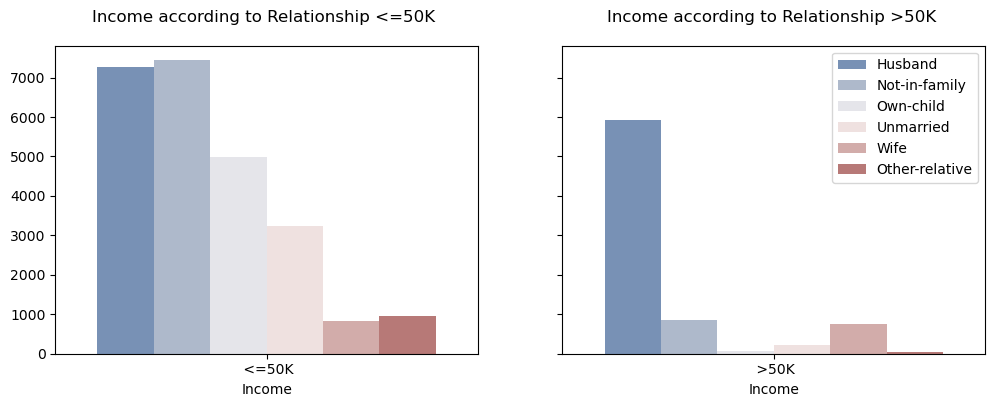

In [79]:
# Compare Relationship vs Income
col = 'Relationship' #5

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

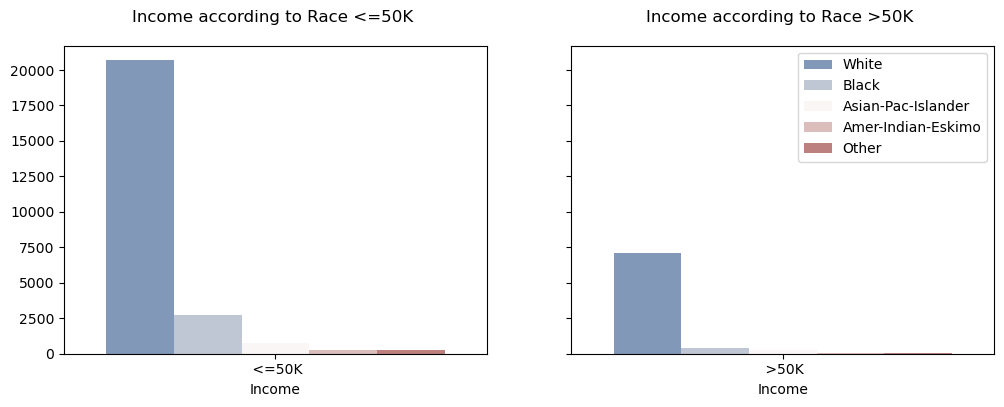

In [81]:
# Compare Race vs Income
col = 'Race' #6

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])

axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

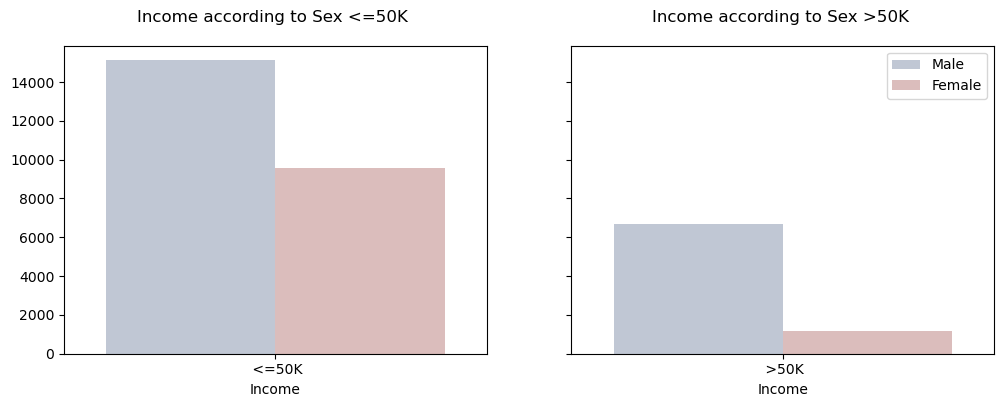

In [83]:
# Compare Sex vs Income
col = 'Sex' #7

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])

axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

In [84]:
# Function to format labels and specify the position for the percentages
def format_label_nc(pct):
    if (pct <= 2) & (pct > 1):   
        return f"\n{pct:.1f}%"
    return f"{pct:.1f}%"

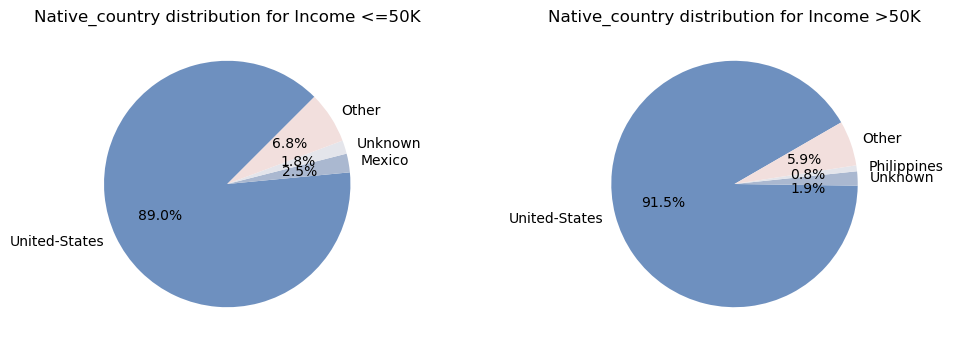

In [85]:
# Distribution of Native_country according to Income
col = 'Native_country' #8

sns.set_palette('vlag')

# Filter the data for the two income categories
df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

# Calculate the counts for each 'Marital_status' category in each income group
counts_less_50K = df_less_50K[col].value_counts()
counts_more_50K = df_more_50K[col].value_counts()

# Create subplots for the pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Select 3 top categories for 'Income <=50K'
top_categories = counts_less_50K.nlargest(3)
labels = top_categories.index.to_list()
labels.append('Other')
data = top_categories.to_list()
data.append(counts_less_50K.sum() - top_categories.sum())

# Plot pie chart for 'Income <=50K'
axes[0].pie(data, labels=labels, autopct='%1.1f%%', startangle=45)
axes[0].set_title(f"{col} distribution for Income <=50K")

# Select 3 top categories for 'Income >50K'
top_categories = counts_more_50K.nlargest(3)
labels = top_categories.index.to_list()
labels.append('Other')
data = top_categories.to_list()
data.append(counts_more_50K.sum() - top_categories.sum())

# Plot pie chart for 'Income >50K'
axes[1].pie(data, labels=labels,  autopct=format_label_nc, startangle=30)
axes[1].set_title(f"{col} distribution for Income >50K")

plt.show()

he majority of the samples correspond to the United States, so in both the group with income >50K and the group with income <=50K this is the most representative group. However, from the above plot, we can see that for the group of those who earn >50K the second most representative group would be the Philippines with 0.8%, leaving aside the 1.9% that corresponds to missing data. In contrast, the second most representative group for those who have an income <=50K is Mexico with 2.5%.

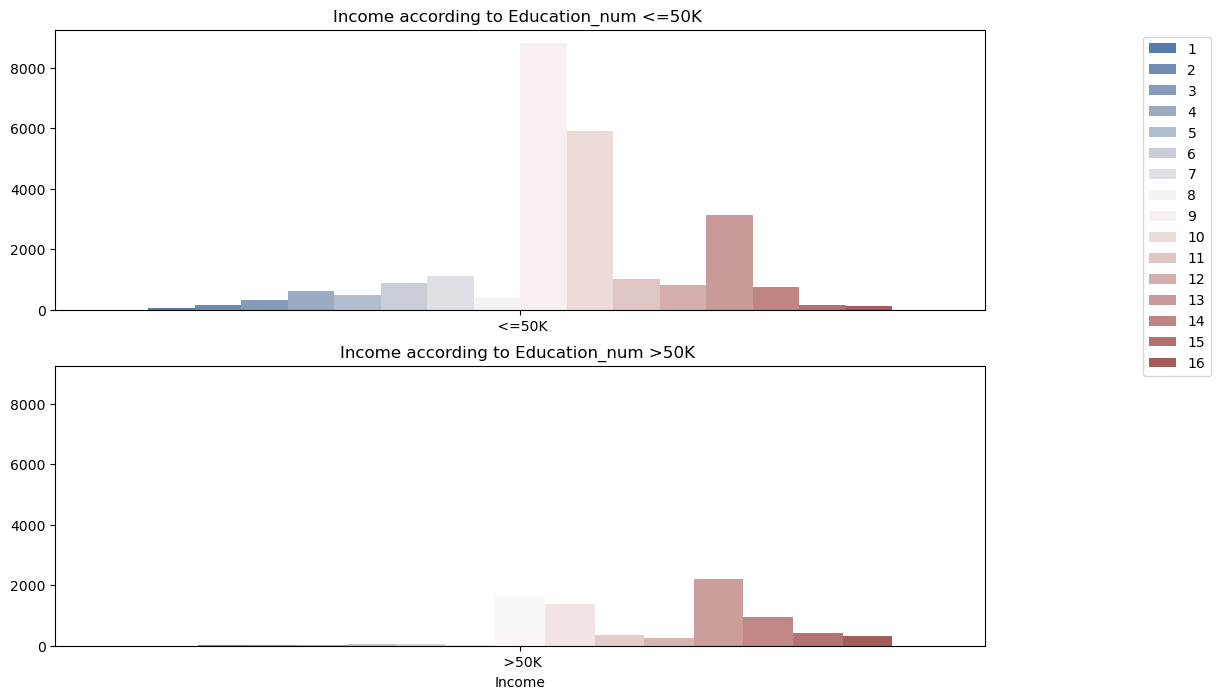

In [87]:
# Compare Education_num vs Income
col = 'Education_num' 

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].set_xlabel('', size=10, labelpad=8)
axes[0].legend(loc='upper right', bbox_to_anchor=(1.25, 1))

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])

axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend().remove()

plt.show()

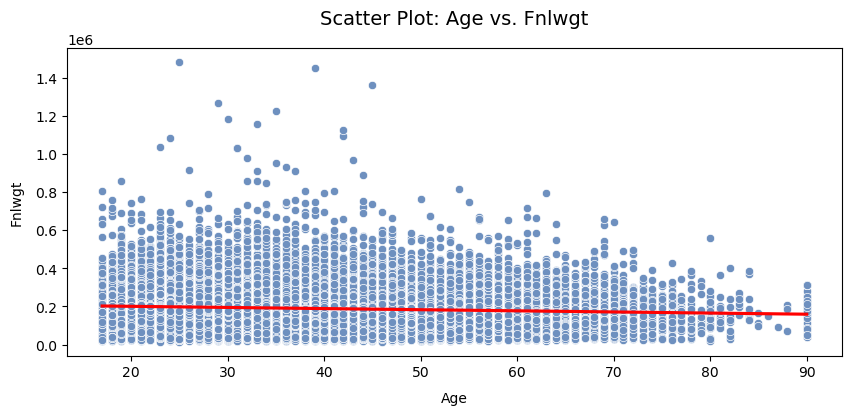

In [88]:
plt.figure(figsize=(10, 4))
col1 = 'Age'
col2 = 'Fnlwgt'
ax = sns.scatterplot(x=col1, y= col2, data=df)
sns.regplot(x=col1, y=col2, data=df, scatter=False, ax=ax, color='r')

plt.xlabel(col1, size=10, labelpad=8)
plt.ylabel(col2, size=10, labelpad=8)
plt.title(f'Scatter Plot: {col1} vs. {col2}', size=14, y=1.05);

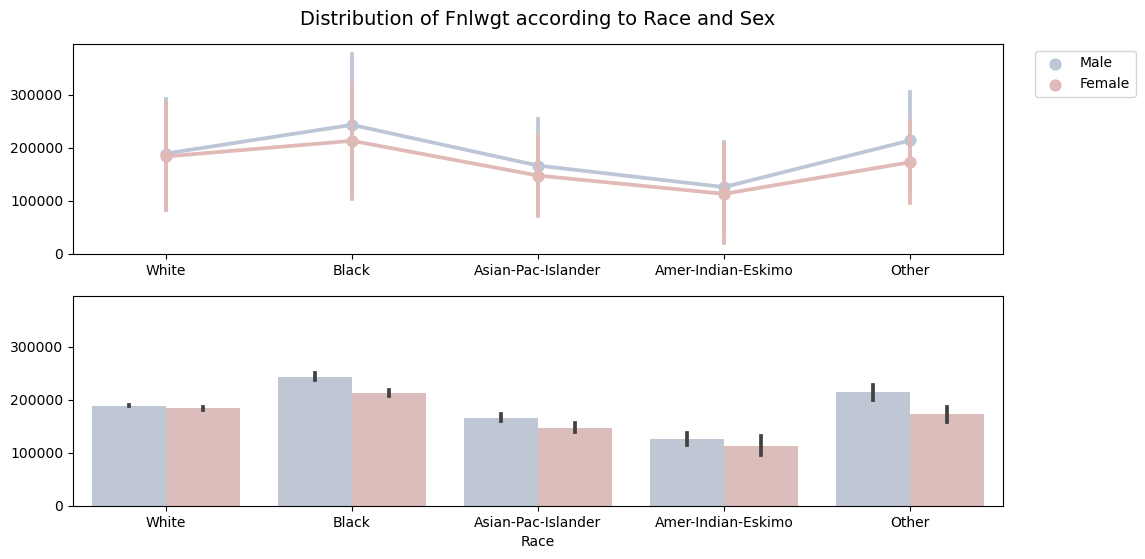

In [89]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharey=True)

col1 = 'Fnlwgt'
col2 = 'Race'
col3 = 'Sex'
# Comparing standar deviation with a pointplot
sns.pointplot(x=col2, y= col1, hue=col3, data=df, ci='sd', palette='vlag', ax=axes[0])
# Comparing the mean
sns.barplot(x=col2, y= col1, hue=col3, data=df, palette='vlag', ax=axes[1])

axes[0].set_title(f'Distribution of {col1} according to {col2} and {col3}', size=14, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].set_xlabel('', size=10, labelpad=8)
axes[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1))
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend().remove();

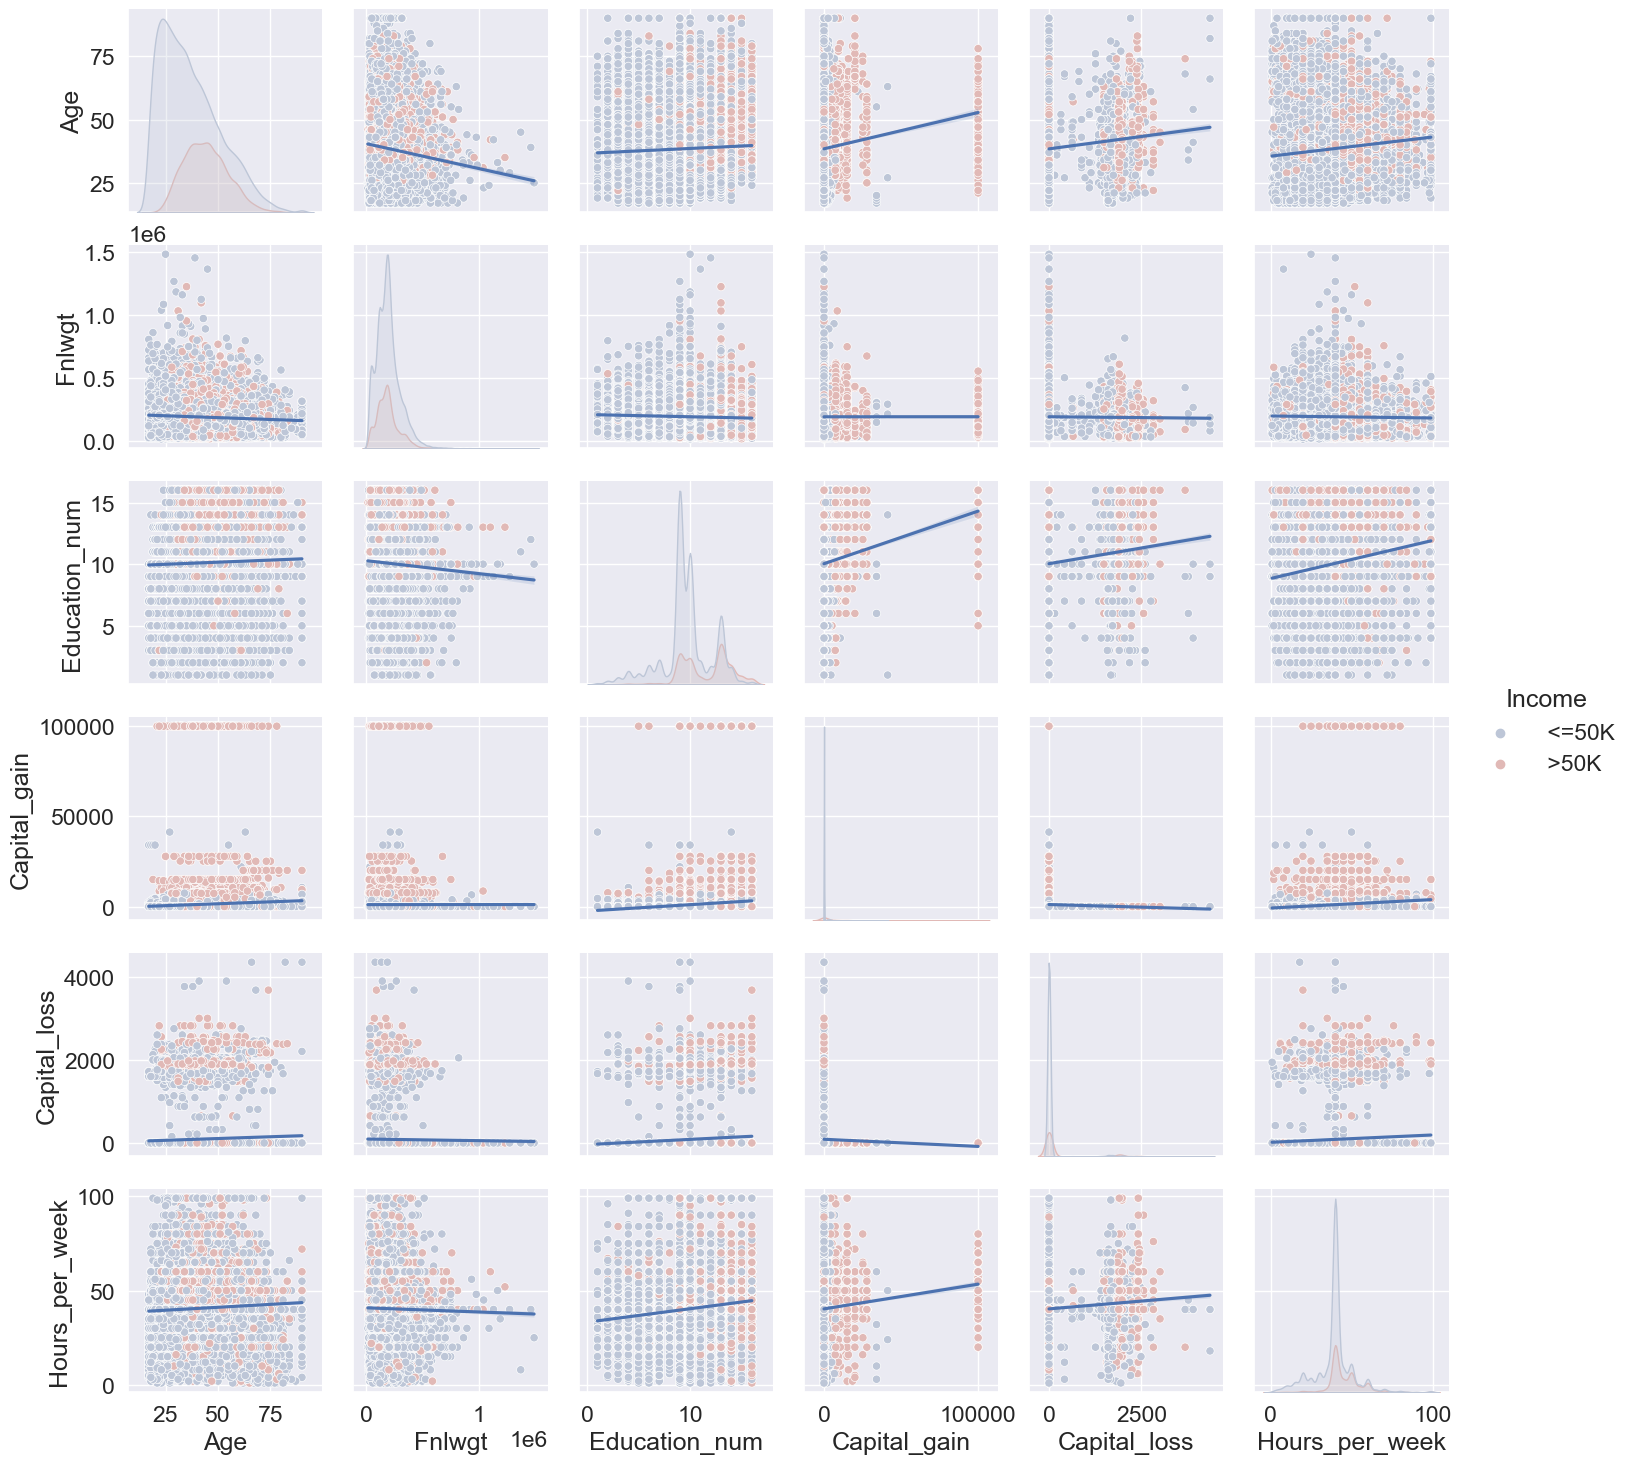

In [90]:
sns.set(font_scale=1.5)  
grid = sns.pairplot(df, hue='Income', palette = "vlag")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()


In [91]:
# Eliminating extra spaces 
df['Income'] = df['Income'].str.strip()

df['Income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [92]:
df['Income'] = df['Income'].map({'<=50K': 0, '>50K': 1})
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Education_bk
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,Bachelors
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,HS-grad
2,53,Private,234721,Below High School,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,11th
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,Bachelors
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,Masters


In [93]:
# Calculate the correlation between features
cor = df.corr()
cor

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076448,0.036224,0.077676,0.057745,0.068515,0.234039
Fnlwgt,-0.076448,1.000000,-0.043353,0.000433,-0.010267,-0.018900,-0.009521
Education_num,0.036224,-0.043353,1.000000,0.122661,0.079901,0.148426,0.335299
Capital_gain,0.077676,0.000433,0.122661,1.000000,-0.031638,0.078408,0.223340
Capital_loss,0.057745,-0.010267,0.079901,-0.031638,1.000000,0.054229,0.150498
Hours_per_week,0.068515,-0.018900,0.148426,0.078408,0.054229,1.000000,0.229659
Income,0.234039,-0.009521,0.335299,0.223340,0.150498,0.229659,1.000000


In [94]:
# Listing the correlation coeficients with the target variable 
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'Income') ]

,Feature A,Feature B,Corr coef
6,Income,Income,1.000000
8,Income,Education_num,0.335299
9,Income,Age,0.234039
11,Income,Hours_per_week,0.229659
14,Income,Capital_gain,0.223340
15,Income,Capital_loss,0.150498
37,Income,Fnlwgt,-0.009521


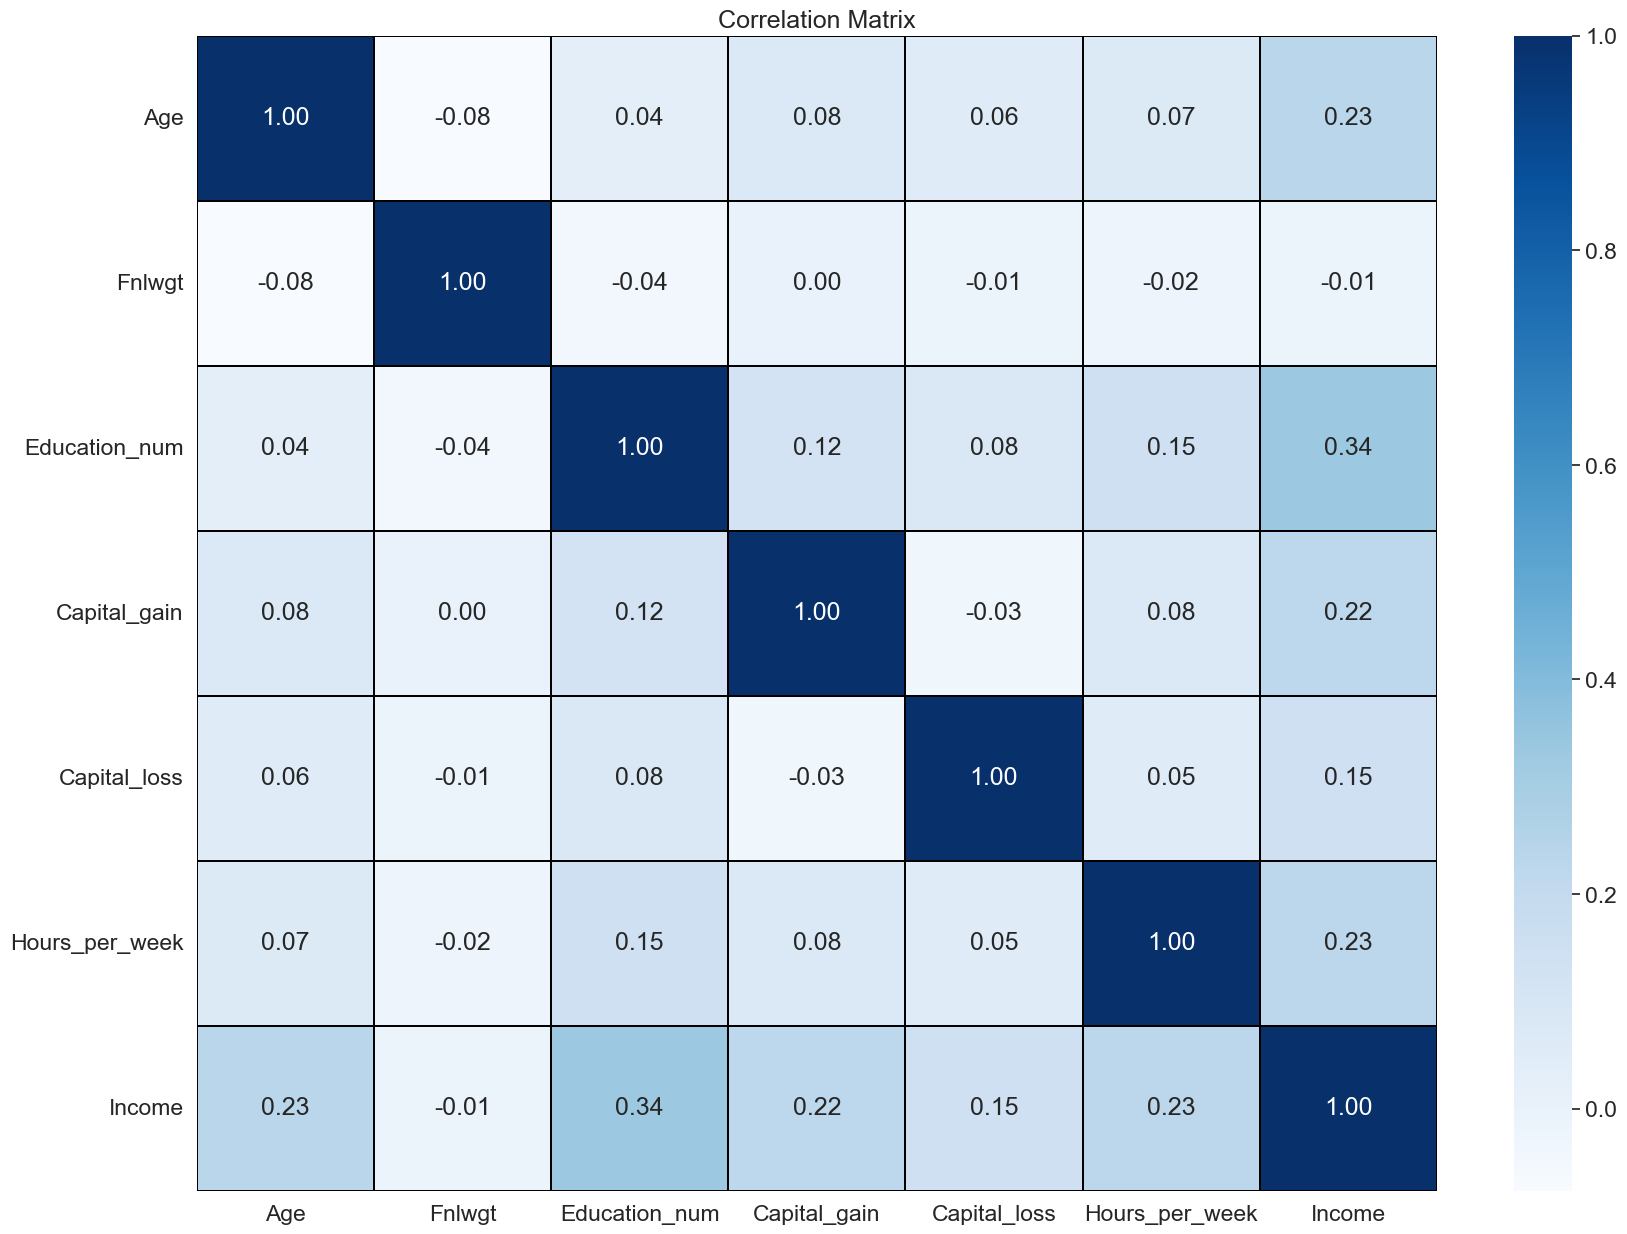

In [95]:
sns.set(font_scale=1.5)  

# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(cor, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='Blues', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix')
plt.show()

This heatmap contains both positive and negative correlations.
The target is medium correlated with Education_num(+0.34), and low correlated with Hours_per_week(+0.23), Age(+0.23), Capital_gain(+0.22), and Capital_loss(+0.15)
The Education_num is slightly correlated with Hours_per_week(+0.15) and Capital_gain(+0.12)

In [96]:
# Replace Unknown for np.NaN
for col in ['Workclass', 'Occupation', 'Native_country']:
    print(f"Values for {col}:\n{df[col].value_counts(dropna=False)[:8]}\n")
    df[col] = np.where(df[col]=='Unknown', np.NaN, df[col])
    print(f"New Values for {col}:\n{df[col].value_counts(dropna=False)[:8]}\n")

Values for Workclass:
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Name: Workclass, dtype: int64

New Values for Workclass:
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
NaN                  1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Name: Workclass, dtype: int64

Values for Occupation:
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3767
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Unknown              1843
Name: Occupation, dtype: int64

New Values for Occupation:
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3767
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Na

In [ ]:
#The 'Unknown' values were encoded to NaN. Now, we will check for missing values.

In [97]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

,Null values,% of missing
Age,0,0.00
Workclass,1836,5.64
Fnlwgt,0,0.00
Education,0,0.00
Education_num,0,0.00
Marital_status,0,0.00
Occupation,1843,5.66
Relationship,0,0.00
Race,0,0.00
Sex,0,0.00


In [ ]:
#Statistically speaking, if the number of missing observations is less than 5% of the sample, we can drop them. However, we are going to set the threshold as 2% in order to lose less than 1.8% of data.

In [98]:
cols_less_than_thr = missing_val[(missing_val['% of missing'] > 0) & (missing_val['% of missing'] < 2)].index.to_list()
cols_less_than_thr


['Native_country']

In [99]:
# Dropping the missing values with % of missing less than 2.4%
df_new = df.dropna(subset=cols_less_than_thr)

print(f"{df.shape[0] - df_new.shape[0]} rows with missing values were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()

582 rows with missing values were deleted.
This represent 1.79% of the data.
In the new dataset there are 31954 rows and 16 columns.


In [100]:
cols_more_than_thr = missing_val[missing_val['% of missing'] > 2].index.to_list()
cols_more_than_thr

['Workclass', 'Occupation']

In [101]:
# listing the possible imputation values 
for col in cols_more_than_thr:
    print(f"Column = {col} Mode = {df[col].mode()[0]}")

Column = Workclass Mode = Private
Column = Occupation Mode = Prof-specialty


In [ ]:
#To make a more accurate analysis, we will use the mode according to Income and Education.

In [102]:
impu_val = {}

# Define Columns to group the data
group_col = ['Income','Education']

# List of mode according
for col in cols_more_than_thr:
    impu_val[col] = df.groupby(group_col)[[col]].agg(lambda x: x.mode().iloc[0])
    print(f"Imputation values for {col}:\n{impu_val[col]}\n")

Imputation values for Workclass:
                         Workclass
Income Education                  
0      Doctorate           Private
       Masters             Private
       Bachelors           Private
       Associate           Private
       Prof-school         Private
       Some-college        Private
       HS-grad             Private
       Below High School   Private
1      Doctorate           Private
       Masters             Private
       Bachelors           Private
       Associate           Private
       Prof-school         Private
       Some-college        Private
       HS-grad             Private
       Below High School   Private

Imputation values for Occupation:
                               Occupation
Income Education                         
0      Doctorate           Prof-specialty
       Masters             Prof-specialty
       Bachelors           Prof-specialty
       Associate             Adm-clerical
       Prof-school         Prof-specialty
       S

For Workclass we will use Private to impute the missing values.
For Occupation we will use the corresponding mode according to Income and Education to impute the missing values.

In [103]:
# Imputing missing values for Workclass 
impute_value = 'Private'
col = 'Workclass'
print(f"Impute the missing values in {col} with the mode: {impute_value}")

# Fill missing values with the impute value 
df[col].fillna(impute_value, inplace=True)
print(f"Missing values in {col}: {df[col].isnull().sum()}\n")

Impute the missing values in Workclass with the mode: Private
Missing values in Workclass: 0



In [104]:
# Imputing missing values for Occupation
col = 'Occupation'
mapping_dict = impu_val[col].to_dict()
print(f"Impute the missing values in {col} with the mode:")
display(mapping_dict)

# Fill missing values with the impute value 
df[col] = df[col].fillna(df.apply(lambda row: mapping_dict[col].get((row['Income'], row['Education']), row[col]), axis=1))
print(f"Missing values in {col}: {df[col].isnull().sum()}\n")

Impute the missing values in Occupation with the mode:


{'Occupation': {(0, 'Doctorate'): 'Prof-specialty',
  (0, 'Masters'): 'Prof-specialty',
  (0, 'Bachelors'): 'Prof-specialty',
  (0, 'Associate'): 'Adm-clerical',
  (0, 'Prof-school'): 'Prof-specialty',
  (0, 'Some-college'): 'Adm-clerical',
  (0, 'HS-grad'): 'Craft-repair',
  (0, 'Below High School'): 'Other-service',
  (1, 'Doctorate'): 'Prof-specialty',
  (1, 'Masters'): 'Prof-specialty',
  (1, 'Bachelors'): 'Exec-managerial',
  (1, 'Associate'): 'Exec-managerial',
  (1, 'Prof-school'): 'Prof-specialty',
  (1, 'Some-college'): 'Exec-managerial',
  (1, 'HS-grad'): 'Craft-repair',
  (1, 'Below High School'): 'Craft-repair'}}

Missing values in Occupation: 0



In [105]:
df.isnull().sum().sum()

0

In [106]:
 # Checking the unique values of the categorical independent variables
for i, col in enumerate(categorical_col[:-1]):
    print(f"{i+1}.{col}:\n  {df[col].unique()}\n")

1.Workclass:
  ['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

2.Education:
  ['Bachelors', 'HS-grad', 'Below High School', 'Masters', 'Some-college', 'Associate', 'Doctorate', 'Prof-school']
Categories (8, object): ['Doctorate' < 'Masters' < 'Bachelors' < 'Associate' < 'Prof-school' < 'Some-college' < 'HS-grad' < 'Below High School']

3.Marital_status:
  ['Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed']
Categories (7, object): ['Married-civ-spouse' < 'Never-married' < 'Divorced' < 'Separated' < 'Widowed' < 'Married-spouse-absent' < 'Married-AF-spouse']

4.Occupation:
  ['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']

5.Relationship:
  ['Husband', 'Not-in-family',

We will use LabelEncoder to encode all the categorical columns.

In [107]:
from sklearn.preprocessing import LabelEncoder

category_mappings = {}
encoding_col = categorical_col[:-1]

label_encoder = LabelEncoder()
for col in encoding_col:
    if col != 'Education':
        df[col] = df[col].astype('category')
    df[col] = label_encoder.fit_transform(df[col])
    
    # Store the mapping in a dictionary
    category_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(col,'\n', category_mappings[col],'\n')
    
display(df.head())
display(df.tail())

Workclass 
 {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7} 

Education 
 {'Associate': 0, 'Bachelors': 1, 'Below High School': 2, 'Doctorate': 3, 'HS-grad': 4, 'Masters': 5, 'Prof-school': 6, 'Some-college': 7} 

Marital_status 
 {'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6} 

Occupation 
 {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13} 

Relationship 
 {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5} 

Race 
 {'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4} 

Sex 
 {'

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Education_bk
0,50,5,83311,1,13,2,3,0,4,1,0,0,13,38,0,Bachelors
1,38,3,215646,4,9,0,5,1,4,1,0,0,40,38,0,HS-grad
2,53,3,234721,2,7,2,5,0,2,1,0,0,40,38,0,11th
3,28,3,338409,1,13,2,9,5,2,0,0,0,40,4,0,Bachelors
4,37,3,284582,5,14,2,3,5,4,0,0,0,40,38,0,Masters


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Education_bk
32555,27,3,257302,0,12,2,12,5,4,0,0,0,38,38,0,Assoc-acdm
32556,40,3,154374,4,9,2,6,0,4,1,0,0,40,38,1,HS-grad
32557,58,3,151910,4,9,6,0,4,4,0,0,0,40,38,0,HS-grad
32558,22,3,201490,4,9,4,0,3,4,1,0,0,20,38,0,HS-grad
32559,52,4,287927,4,9,2,3,5,4,0,15024,0,40,38,1,HS-grad


In [108]:
# Drop the Education_bk column 
df.drop('Education_bk', axis=1, inplace=True)

In [109]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df))
z

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.835851,1.719607,1.006419,1.175260,1.143888,0.403777,0.697132,0.900879,0.388144,0.704503,0.145880,0.216076,2.221286,0.263667,0.563110
1,0.042660,0.084402,0.245224,0.132279,0.418939,1.729469,0.201495,0.278491,0.388144,0.704503,0.145880,0.216076,0.034085,0.263667,0.563110
2,1.055478,0.084402,0.425638,0.739414,1.200353,0.403777,0.201495,0.900879,1.993338,0.704503,0.145880,0.216076,0.034085,0.263667,0.563110
3,0.774752,0.084402,1.406333,1.175260,1.143888,0.403777,0.789779,2.211061,1.993338,1.419441,0.145880,0.216076,0.034085,5.305633,0.563110
4,0.115869,0.084402,0.897230,0.568125,1.534594,0.403777,0.697132,2.211061,0.388144,1.419441,0.145880,0.216076,0.034085,0.263667,0.563110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.847961,0.084402,0.639212,1.611106,0.753181,0.403777,1.533235,2.211061,0.388144,1.419441,0.145880,0.216076,0.196100,0.263667,0.563110
32556,0.103758,0.084402,0.334295,0.132279,0.418939,0.403777,0.046323,0.900879,0.388144,0.704503,0.145880,0.216076,0.034085,0.263667,1.775851
32557,1.421524,0.084402,0.357600,0.132279,0.418939,2.247606,1.440588,1.588673,0.388144,1.419441,0.145880,0.216076,0.034085,0.263667,0.563110
32558,1.214007,0.084402,0.111334,0.132279,0.418939,0.921914,1.440588,0.966285,0.388144,0.704503,0.145880,0.216076,1.654234,0.263667,0.563110


In [110]:
# threshold = 3.55
df_new = df[(z<3.55).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df_process = df_new.copy()
df_process

3109 rows with outliers were deleted.
This represent 9.73% of the data.
In the new dataset there are 28845 rows and 15 columns.


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,1,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,4,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,2,7,2,5,0,2,1,0,0,40,38,0
4,37,3,284582,5,14,2,3,5,4,0,0,0,40,38,0
5,49,3,160187,2,5,3,7,1,2,0,0,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,0,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,4,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,4,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,4,9,4,0,3,4,1,0,0,20,38,0


In order to avoid losing more than 10% of the data threshold was defined as 3.55 instead of 3. Therefore only 9.73% of the data was lost.

Number of bins selected for Capital_gain: 32


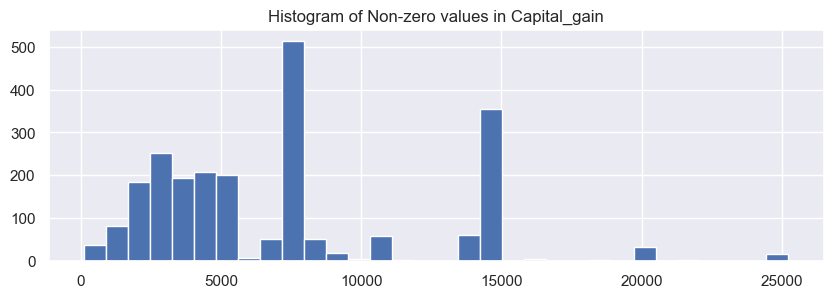

In [111]:
# Filter the non-zero values 
col = 'Capital_gain'
non_zero_values = df_process[col][df_process[col] != 0]

# Styling the plot
sns.set(font_scale=1)
plt.figure(figsize=(10, 3))

# Plot the histograma ('auto' uses a heuristic to determine the number of bins)
n, bins, _ = plt.hist(non_zero_values, bins='auto') 
plt.title(f"Histogram of Non-zero values in {col}")

# Get the number of bins chosen automatically
num_bins_auto = len(bins) - 1
print(f'Number of bins selected for {col}: {num_bins_auto}')
plt.show()

In [112]:
# Dividing into intervals 
df_process[f'{col}_bin'] = pd.cut(df_process[col], bins=num_bins_auto, labels=False, include_lowest=True)

# Review the unique values of the new variable Capital_gain_bin
print(f"Unique values in {col}_bin: \n{df_process[f'{col}_bin'].unique()}\n")
print(f"Total of unique values in {col}_bin: {df_process[f'{col}_bin'].nunique()}")
print(f"Counts of {col}_bin:\n{df_process[f'{col}_bin'].value_counts()}")

Unique values in Capital_gain_bin: 
[ 0 17  6  3 18 19  9  5  1  4  2 25  8 10 31 13  7 27 11 20 12 14 23]

Total of unique values in Capital_gain_bin: 23
Counts of Capital_gain_bin:
0     26551
9       512
19      330
3       288
6       217
4       194
5       186
2       148
1        80
17       61
13       59
10       54
8        54
25       32
18       24
11       18
31       15
7         9
20        4
12        4
14        2
23        2
27        1
Name: Capital_gain_bin, dtype: int64


Number of bins selected for Capital_loss: 9


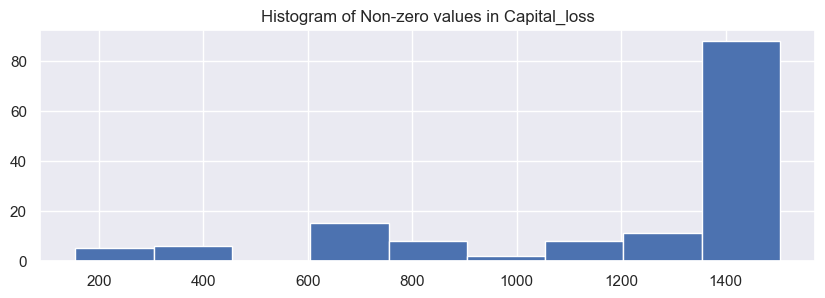

In [113]:
# Filter the non-zero values 
col = 'Capital_loss'
non_zero_values = df_process[col][df_process[col] != 0]

# Styling the plot
sns.set(font_scale=1)
plt.figure(figsize=(10, 3))

# Plot the histograma ('auto' uses a heuristic to determine the number of bins)
n, bins, _ = plt.hist(non_zero_values, bins='auto') 
plt.title(f"Histogram of Non-zero values in {col}")

# Get the number of bins chosen automatically
num_bins_auto = len(bins) - 1
print(f'Number of bins selected for {col}: {num_bins_auto}')
plt.show()

In [114]:
# Dividing into intervals 
df_process[f'{col}_bin'] = pd.cut(df_process[col], bins=num_bins_auto, labels=False, include_lowest=True)

# Review the unique values of the new variable Capital_gain_bin
print(f"Unique values in {col}_bin: \n{df_process[f'{col}_bin'].unique()}\n")
print(f"Total of unique values in {col}_bin: {df_process[f'{col}_bin'].nunique()}")
print(f"Counts of {col}_bin:\n{df_process[f'{col}_bin'].value_counts()}")

Unique values in Capital_loss_bin: 
[0 8 3 2 6 1 5 4 7]

Total of unique values in Capital_loss_bin: 9
Counts of Capital_loss_bin:
0    28703
8       95
3       15
6        8
5        8
1        7
7        4
2        3
4        2
Name: Capital_loss_bin, dtype: int64


In [115]:
# Drop the no-needed columns
df_process.drop(['Capital_gain','Capital_loss'], axis=1, inplace=True)

In [116]:
# Checking the skewness in the data
df_skew = df_process.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

,Skew
Capital_loss_bin,15.529717
Capital_gain_bin,5.275433
Income,1.320063
Relationship,0.754405
Fnlwgt,0.746847
Age,0.527576
Occupation,0.151426
Workclass,0.097738
Education,0.056501
Marital_status,-0.036860


Considering the skewness of the continuous numerical columns:

Fnlwgt (0.746847)
Age (0.527576)
is greater than 0.5 or lower than -0.5, we are going to apply methods to remove it. The other features are not considered since they are categorical or discrete.

In [117]:
# Checking skewness using cuberoot, square-root and log method
skew_columns = ['Fnlwgt', 'Age']
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df_process[col])
    df_transformed[f"{col}_log"] = np.log(df_process[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df_process[col])
        
# Adding the other columns
df_transformed = pd.concat([df_transformed, df_process[skew_columns]], axis=1)

In [118]:
# Comparing which transform method give better results
df_comp = df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

# Reset the index and identify the feature
df_comp.reset_index(inplace=True)
df_comp['feature'] = df_comp['index'].str.extract(r'^(.*)_.*')
df_comp['Skewness_abs'] = abs(df_comp['Skewness'])

# Check the calculated skeweness for 
display(df_comp[df_comp['feature'] == 'Age'] )

# Drop the records with no valid skewness
df_comp = df_comp[~df_comp.Skewness.isnull()]

# Find the indexes of the rows with the minimum 'Skewness_abs' values
min_indices = df_comp.groupby('feature')['Skewness_abs'].idxmin()

# Select the rows corresponding to the minimum values in Skewness_abs,
low_skewness = df_comp.loc[min_indices]
low_skewness

,index,Skewness,feature,Skewness_abs
4,Age_sqrt,0.194771,Age,0.194771
5,Age_log,-0.126909,Age,0.126909
6,Age_cbrt,0.086393,Age,0.086393


,index,Skewness,feature,Skewness_abs
6,Age_cbrt,0.086393,Age,0.086393
0,Fnlwgt_sqrt,-0.035246,Fnlwgt,0.035246


In [119]:
# Selecting columns to apply cube-root transform method
cbrt_columns = ['Age']
print(cbrt_columns)

# Update the df dataset with the transfor data with cube-root method.
for col in cbrt_columns:
    df_process[col] = np.cbrt(df_process[col])

['Age']


In [120]:
# Transform the Fnlwgt column - sqrt
df_process['Fnlwgt'] = np.sqrt(df_process['Fnlwgt'])

In [121]:
df_process[skew_columns].skew().sort_values(ascending=False).to_frame("Skewness after transform")

,Skewness after transform
Age,0.086393
Fnlwgt,-0.035246


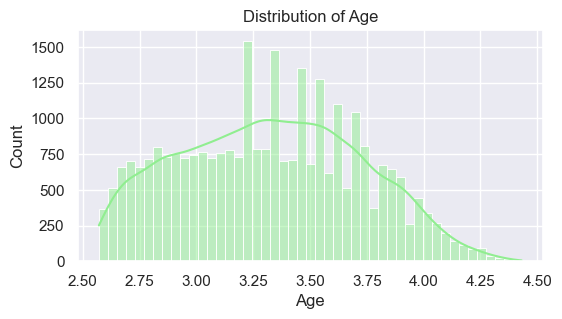

In [122]:
# Visualizing the distribution of the columns after removing skewness
column = 'Age'
plt.figure(figsize=(6, 3))
sns.histplot(data=df_process, x=column, kde=True, color='lightgreen')
plt.title(f"Distribution of {column}")

plt.show()

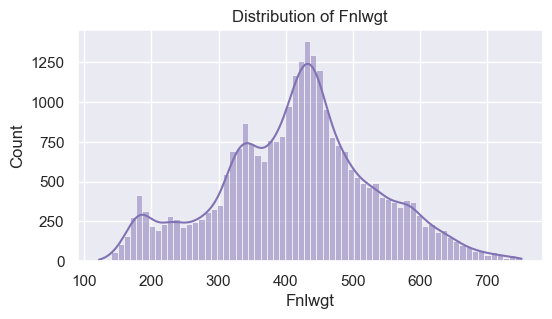

In [123]:
# Visualizing the distribution of the columns after removing skewness
column = 'Fnlwgt'
plt.figure(figsize=(6, 3))
sns.histplot(data=df_process, x=column, kde=True, color='m')
plt.title(f"Distribution of {column}")

plt.show()

In [124]:
# Separating the independent and target variables into x and y 
x = df_process.drop('Income', axis=1)
y = df_process['Income']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")

Feature Dimension = (28845, 14)
Label Dimension = (28845,)


In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling the data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

display(x.head())

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Capital_gain_bin,Capital_loss_bin
0,0.904819,1.726035,-1.112185,-1.177596,1.187509,-0.408553,-0.686745,-0.914442,0.377905,0.712796,-2.301102,0.226978,-0.236065,-0.066679
1,0.095449,-0.082347,0.410722,0.125982,-0.417519,-1.725132,-0.193003,-0.291430,0.377905,0.712796,0.000783,0.226978,-0.236065,-0.066679
2,1.086404,-0.082347,0.584929,-0.743070,-1.220032,-0.408553,-0.193003,-0.914442,-2.286642,0.712796,0.000783,0.226978,-0.236065,-0.066679
3,0.020674,-0.082347,1.009391,0.560508,1.588766,-0.408553,-0.686745,2.200617,0.377905,-1.402927,0.000783,0.226978,-0.236065,-0.066679
4,0.842680,-0.082347,-0.145122,-0.743070,-2.022546,0.249737,0.300738,-0.291430,-2.286642,-1.402927,-2.045337,-5.100811,-0.236065,-0.066679


In [126]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
7,Relationship,1.670579
9,Sex,1.546381
0,Age,1.211506
5,Marital_status,1.155208
10,Hours_per_week,1.131492
4,Education_num,1.084493
11,Native_country,1.067194
8,Race,1.065326
12,Capital_gain_bin,1.048869
3,Education,1.020756


As we can see after the standardization there is no multicollinearit issue (No value is greater than 10). Infinite values correspond to categorical features. We can continue with model building.

Now we are going to balance the dataset and then move ahead from model building.

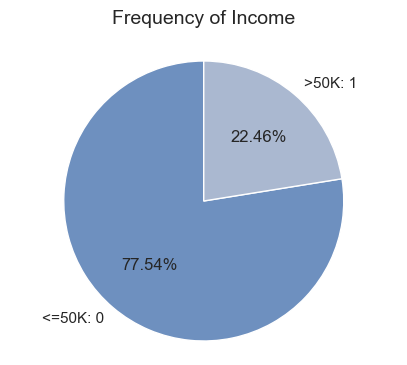

In [127]:
# Count the frequencies of target
target_counts = y.value_counts()

# Create a pie plot
sns.set_palette('vlag')
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['<=50K: 0', '>50K: 1'], autopct='%1.2f%%', startangle=90)

plt.title("Frequency of Income", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [128]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

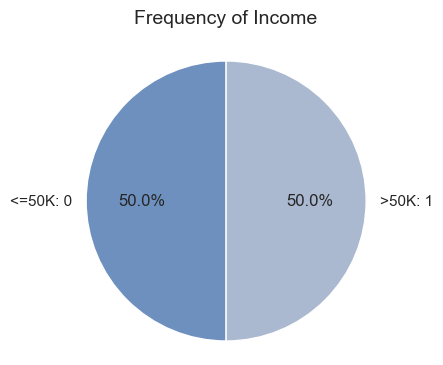

In [129]:
# Count the frequencies of target
target_counts = y1.value_counts()

# Create a pie plot
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['<=50K: 0', '>50K: 1'], autopct='%1.1f%%', startangle=90)

plt.title("Frequency of Income", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [130]:
X = x1
Y = y1

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]

In [132]:
# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.904 at random_state 147


In [133]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (31313, 14)
x_test shape:   (13421, 14)
y_train shape:  (31313,)
y_test shape:   (13421,)


In [134]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [135]:
# Functions 
def calc_accuracy(model, id_model):
    ''' Calculate the accuracy of the model. Return the accuracy, training accuracy, and the predicted values.'''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_train = model.score(x_train, y_train)
    
    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n {classification_report(y_test, y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")
    
    return [acc, acc_train, y_pred]

In [136]:
models = {'RandomForestClassifier' : RandomForestClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(), 
          'AdaBoostClassifier': AdaBoostClassifier(), 
          'BaggingClassifier': BaggingClassifier()}

# Setting up for saving the results of each model
df_model_accuracy = pd.DataFrame(columns=['id','Model','Training Accuracy','Model Accuracy Score'])
y_pred = {}


In [137]:
id_model = 'RandomForestClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: RandomForestClassifier
Confusion matrix: 
 [[5908  737]
 [ 549 6227]]
Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      6645
           1       0.89      0.92      0.91      6776

    accuracy                           0.90     13421
   macro avg       0.90      0.90      0.90     13421
weighted avg       0.90      0.90      0.90     13421

Training Accuracy using RandomForestClassifier is 100.00%
The accuracy score using RandomForestClassifier is 90.42%


In [138]:
id_model = 'ExtraTreesClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: ExtraTreesClassifier
Confusion matrix: 
 [[5877  768]
 [ 453 6323]]
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.88      0.91      6645
           1       0.89      0.93      0.91      6776

    accuracy                           0.91     13421
   macro avg       0.91      0.91      0.91     13421
weighted avg       0.91      0.91      0.91     13421

Training Accuracy using ExtraTreesClassifier is 100.00%
The accuracy score using ExtraTreesClassifier is 90.9%


In [139]:
id_model = 'LogisticRegression'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: LogisticRegression
Confusion matrix: 
 [[5038 1607]
 [1437 5339]]
Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      6645
           1       0.77      0.79      0.78      6776

    accuracy                           0.77     13421
   macro avg       0.77      0.77      0.77     13421
weighted avg       0.77      0.77      0.77     13421

Training Accuracy using LogisticRegression is 76.66%
The accuracy score using LogisticRegression is 77.32%


In [140]:
id_model = 'SVC'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: SVC
Confusion matrix: 
 [[5171 1474]
 [ 666 6110]]
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      6645
           1       0.81      0.90      0.85      6776

    accuracy                           0.84     13421
   macro avg       0.85      0.84      0.84     13421
weighted avg       0.85      0.84      0.84     13421

Training Accuracy using SVC is 83.98%
The accuracy score using SVC is 84.05%


In [141]:
id_model = 'GradientBoostingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: GradientBoostingClassifier
Confusion matrix: 
 [[5507 1138]
 [ 652 6124]]
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      6645
           1       0.84      0.90      0.87      6776

    accuracy                           0.87     13421
   macro avg       0.87      0.87      0.87     13421
weighted avg       0.87      0.87      0.87     13421

Training Accuracy using GradientBoostingClassifier is 86.30%
The accuracy score using GradientBoostingClassifier is 86.66%


In [142]:
id_model = 'AdaBoostClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: AdaBoostClassifier
Confusion matrix: 
 [[5551 1094]
 [ 877 5899]]
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      6645
           1       0.84      0.87      0.86      6776

    accuracy                           0.85     13421
   macro avg       0.85      0.85      0.85     13421
weighted avg       0.85      0.85      0.85     13421

Training Accuracy using AdaBoostClassifier is 84.79%
The accuracy score using AdaBoostClassifier is 85.31%


In [143]:

id_model = 'BaggingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: BaggingClassifier
Confusion matrix: 
 [[5918  727]
 [ 765 6011]]
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      6645
           1       0.89      0.89      0.89      6776

    accuracy                           0.89     13421
   macro avg       0.89      0.89      0.89     13421
weighted avg       0.89      0.89      0.89     13421

Training Accuracy using BaggingClassifier is 99.33%
The accuracy score using BaggingClassifier is 88.88%


In [144]:
df_model_accuracy = df_model_accuracy.sort_values(by='Model Accuracy Score', ascending=False)
display(df_model_accuracy)

,id,Model,Training Accuracy,Model Accuracy Score
1,ExtraTreesClassifier,"(ExtraTreeClassifier(random_state=820164440), ...",1.000000,0.909023
0,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",0.999968,0.904180
6,BaggingClassifier,(DecisionTreeClassifier(random_state=498908409...,0.993325,0.888831
4,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.863028,0.866627
5,AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=1, random_st...",0.847859,0.853141
3,SVC,SVC(),0.839779,0.840548
2,LogisticRegression,LogisticRegression(),0.766583,0.773191


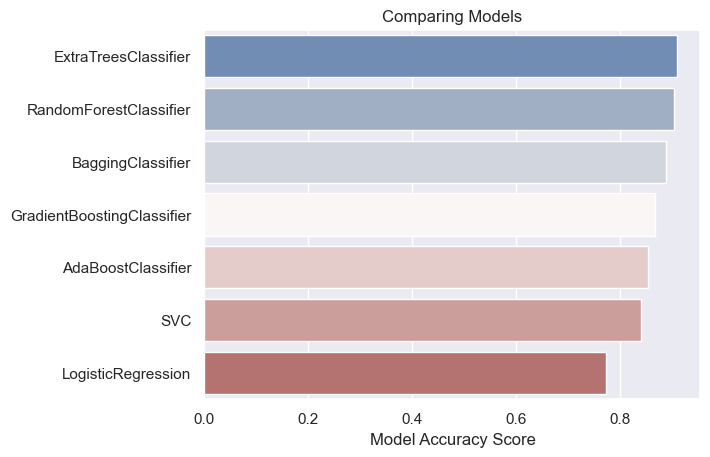

In [145]:
sns.barplot(y= 'id', x= 'Model Accuracy Score', data= df_model_accuracy, palette='vlag')
plt.title('Comparing Models')
plt.xlabel('Model Accuracy Score')
plt.ylabel('');

In [146]:
def checking_cvscore(id_model, model, y_pred):
    score = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    
    score_mean = score.mean()
    diff = accuracy_score(y_test, y_pred) - score_mean
    
    print(f"\n::: Model: {id_model}::: \nscore:{score}")
    print(f"Score mean: {score_mean:.4f}")
    print(f"Difference between Accuracy score and cross validation score is {diff:.4f}")
    return [score_mean, diff]

In [147]:
# Define the new columns for CV metrics
df_model_accuracy['CV score mean'] = np.NaN
df_model_accuracy['Diff Acc and cv score'] = np.NaN
# Setting the id model as index
df_model_accuracy.set_index("id", inplace=True)

In [148]:
# Evaluate cross-validation for each model and save the scores.
for id_model, model in models.items():
    score_mean, diff = checking_cvscore(id_model, model, y_pred[id_model])
    
    df_model_accuracy.loc[id_model, 'CV score mean'] = score_mean
    df_model_accuracy.loc[id_model, 'Diff Acc and cv score'] = diff
    


::: Model: RandomForestClassifier::: 
score:[0.8263105  0.88867777 0.92276741 0.93170895 0.92678292]
Score mean: 0.8992
Difference between Accuracy score and cross validation score is 0.0049

::: Model: ExtraTreesClassifier::: 
score:[0.87090645 0.90097239 0.92869118 0.93047949 0.92879499]
Score mean: 0.9120
Difference between Accuracy score and cross validation score is -0.0029

::: Model: LogisticRegression::: 
score:[0.76316084 0.7716553  0.76483738 0.77534369 0.76950592]
Score mean: 0.7689
Difference between Accuracy score and cross validation score is 0.0043

::: Model: SVC::: 
score:[0.82932827 0.83145188 0.83681681 0.84061697 0.8421641 ]
Score mean: 0.8361
Difference between Accuracy score and cross validation score is 0.0045

::: Model: GradientBoostingClassifier::: 
score:[0.81468649 0.85369398 0.87045937 0.88331284 0.87603398]
Score mean: 0.8596
Difference between Accuracy score and cross validation score is 0.0070

::: Model: AdaBoostClassifier::: 
score:[0.80574494 0.84598

In [149]:
# Present the metrics to eval the best model
df_model_accuracy.sort_values(by=['Model Accuracy Score', 'CV score mean','Diff Acc and cv score'], ascending=[False, False, True])

,Model,Training Accuracy,Model Accuracy Score,CV score mean,Diff Acc and cv score
id,,,,,
ExtraTreesClassifier,"(ExtraTreeClassifier(random_state=820164440), ...",1.000000,0.909023,0.911969,-0.002946
RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",0.999968,0.904180,0.899250,0.004931
BaggingClassifier,(DecisionTreeClassifier(random_state=498908409...,0.993325,0.888831,0.882663,0.006168
GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.863028,0.866627,0.859637,0.006990
AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=1, random_st...",0.847859,0.853141,0.847543,0.005597
SVC,SVC(),0.839779,0.840548,0.836076,0.004473
LogisticRegression,LogisticRegression(),0.766583,0.773191,0.768901,0.004291


In [150]:
random_state

147

In [151]:
model = ExtraTreesClassifier()
model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [152]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
             'bootstrap':[True, False],
             'criterion':['gini', 'entropy'],
             'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
             'min_samples_leaf': np.arange(1, 5),  # Vary the minimum samples required for a leaf
             'n_estimators': np.arange(50, 310, 10),  # Vary the number of trees
             'max_depth': [None] + list(np.arange(20, 110, 10)),  # Vary the maximum depth of trees
             'max_features': ['auto', 'sqrt', 'log2'],
             'random_state': [random_state, 50, 500, 1000],
             'n_jobs': [-1, -1, 1]
             }

# Build the model 
model = ExtraTreesClassifier()

In [153]:
# Perform search with cross validation
# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_grid, 
                                   n_iter=10, scoring='accuracy', cv=3, 
                                   random_state=random_state, n_jobs=-1)
# Fit the model 
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]),
                                        'n_jobs': [-1, -1, 1],
                                        'random_state': [147, 50, 500, 1000]},
                   random_state=147, scoring='accuracy')

In [154]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for ExtraTreesClassifier model:")
display(best_params)

Best Parameters for ExtraTreesClassifier model:


{'random_state': 500,
 'n_jobs': 1,
 'n_estimators': 170,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'criterion': 'entropy',
 'bootstrap': False}

In [155]:
best_model

ExtraTreesClassifier(criterion='entropy', max_depth=40, min_samples_split=3,
                     n_estimators=170, n_jobs=1, random_state=500)

In [156]:
# Create the model with the best parameters
best_model = ExtraTreesClassifier (criterion = 'gini',
                                   bootstrap = False,
                                   max_depth = 40,
                                   max_features = 'sqrt',
                                   min_samples_split = 3,
                                   min_samples_leaf = 1,
                                   n_estimators = 300,
                                   n_jobs = -1, 
                                   random_state = 1000)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 90.97%


In [157]:
models

{'RandomForestClassifier': RandomForestClassifier(),
 'ExtraTreesClassifier': ExtraTreesClassifier(),
 'LogisticRegression': LogisticRegression(),
 'SVC': SVC(),
 'GradientBoostingClassifier': GradientBoostingClassifier(),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'BaggingClassifier': BaggingClassifier()}

In [158]:
prediction = best_model.predict(x_test)

# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {accuracy_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Accuracy score: 90.969 %


,0,1,2,3,4,5,6,7,8,9,...,13411,13412,13413,13414,13415,13416,13417,13418,13419,13420
Predicted,0,0,1,1,1,1,0,0,0,0,...,1,0,0,0,1,0,1,1,1,1
Original,0,0,1,1,1,1,0,1,0,0,...,1,1,0,0,1,0,1,1,0,1


The given dataset consists of 32560 rows and 15 columns. Out of which 1 is the target variable "Income" and the remaining 14 are independent variables. We have done uni-variate, bi-variate analysis on each of them.

The best model was ExtraTreesClassifier with accuracy_score: 90.969%

Dropping missing values represented the elimination of 1.79% of the data, 582 rows were dropped.
Managing the outliers represented the elimination of 9.73% of the total records (3109 rows). Threshold was set as 3.6 instead of 3.
Considering the Capital_gain and Capital_loss columns have a high percentage of zeros , we applied discretization/binning in order to simplify these features and enhance the model's interpretability. The transformed columns were Capital_gain_bin and Capital_loss_bin.